In [ ]:
import pandas as pd

# Loading dataset
df = pd.read_csv('zidio.csv')

# Show first few rows
print("First rows:")
print(df.head())

#columns and data types showing
print("\nData types:")
print(df.dtypes)

# missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Clean column names (strip spaces, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#'date' column, converting to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')  # sort chronological manner
    df.set_index('date', inplace=True)

# Handle missing values - Drop rows with missing values
df_cleaned = df.dropna()

#  after cleaning
print("\nAfter cleaning:")
print(df_cleaned.info())
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

# Save clean file
df_cleaned.to_csv('zidio_cleaned.csv')


First rows:
         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23

Data types:
Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

Missing values per column:
Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

After cleaning:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-03-01 to 2020-02-28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   close/last  2518 non-null   object
 1   volume      2518 n

Data prepared. Shape: (19, 10)
              close     volume     open     high      low  daily_return  \
date                                                                      
2010-03-01  29.8557  137312041  29.3928  29.9286  29.3500           NaN   
2010-05-05  36.5693  220353346  36.1471  36.8771  35.5328     22.486828   
2010-05-06  35.1786  319584886  36.2614  36.8928  28.4643     -3.802917   
2010-05-07  33.6943  418562326  34.8157  35.2243  32.1728     -4.219327   
2012-02-14  72.7800  114963904  72.0943  72.7943  71.7143    116.000926   

            price_range  year     month day_of_week  
date                                                 
2010-03-01       0.5786  2010     March      Monday  
2010-05-05       1.3443  2010       May   Wednesday  
2010-05-06       8.4285  2010       May    Thursday  
2010-05-07       3.0515  2010       May      Friday  
2012-02-14       1.0800  2012  February     Tuesday  


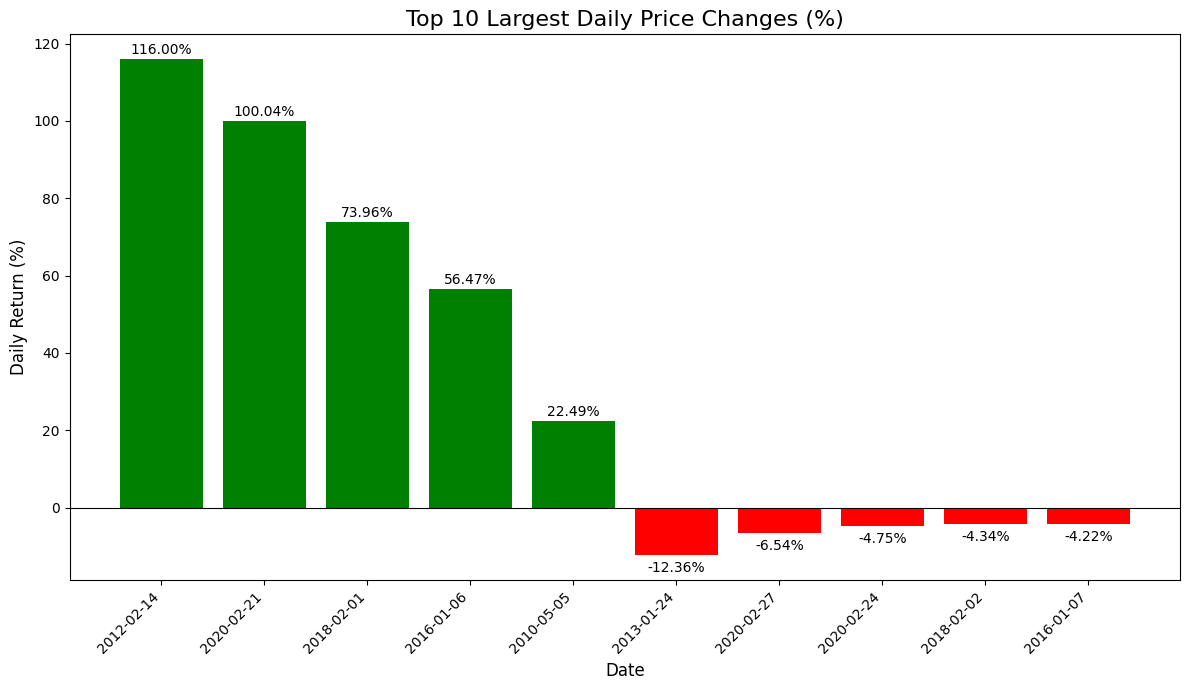


Top 10 largest daily changes:
                close  daily_return
date                              
2012-02-14   72.7800    116.000926
2020-02-21  313.0500    100.044731
2018-02-01  167.7800     73.955417
2016-01-06  100.7000     56.470692
2010-05-05   36.5693     22.486828
2013-01-24   64.3571    -12.355014
2020-02-27  273.5200     -6.536819
2020-02-24  298.1800     -4.750040
2018-02-02  160.5000     -4.339015
2016-01-07   96.4500     -4.220457


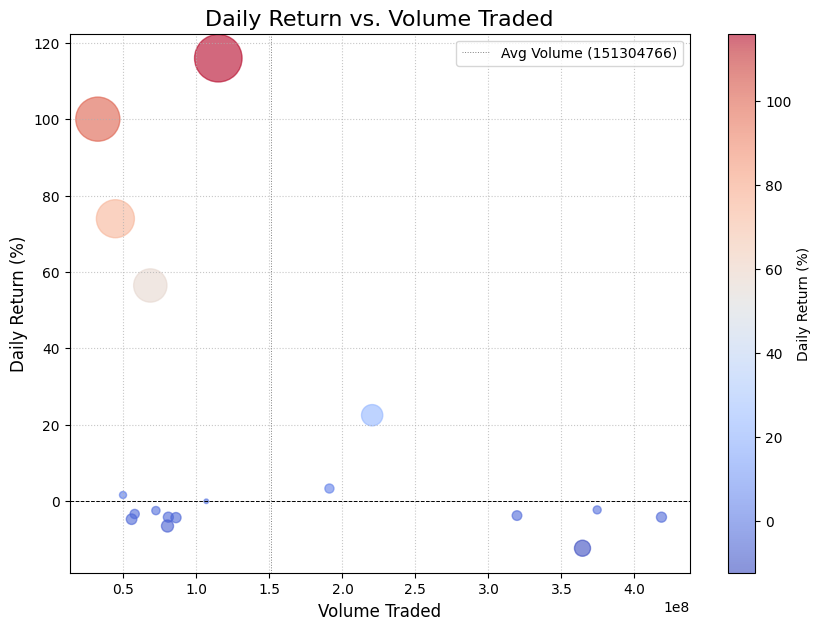

<ipython-input-2-3785821919>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='price_range', data=df, palette="viridis")


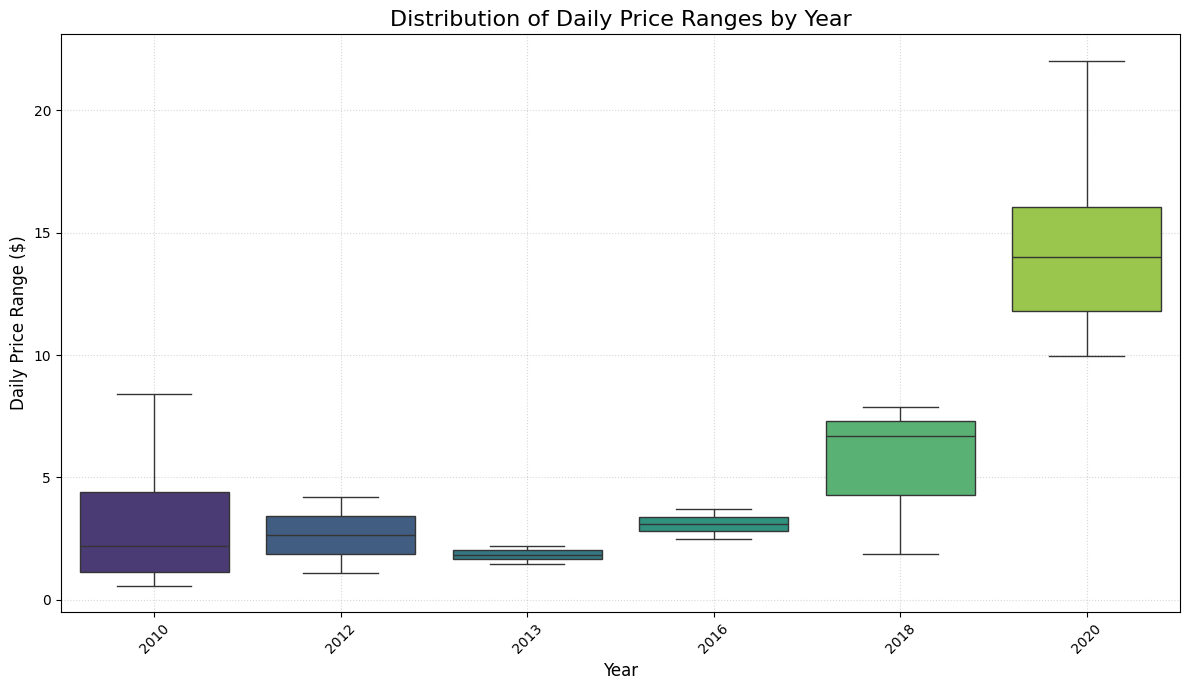

Not enough data to generate monthly volatility heatmap.
mplfinance not installed. To install, run: !pip install mplfinance


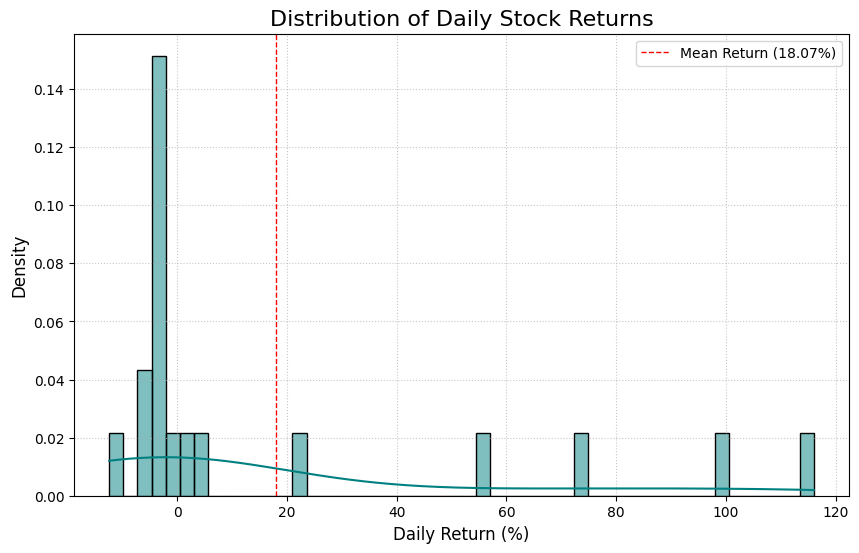

<ipython-input-2-3785821919>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day_of_week', y='daily_return', data=df, order=day_order, palette='pastel', inner='quartile')


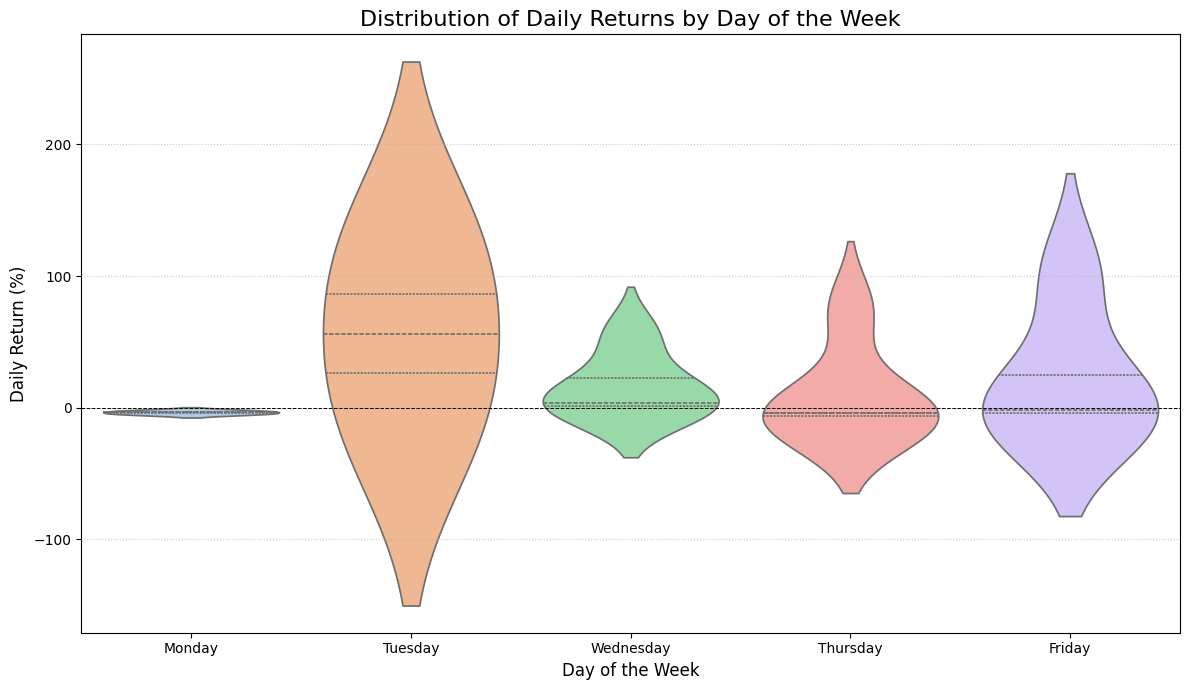

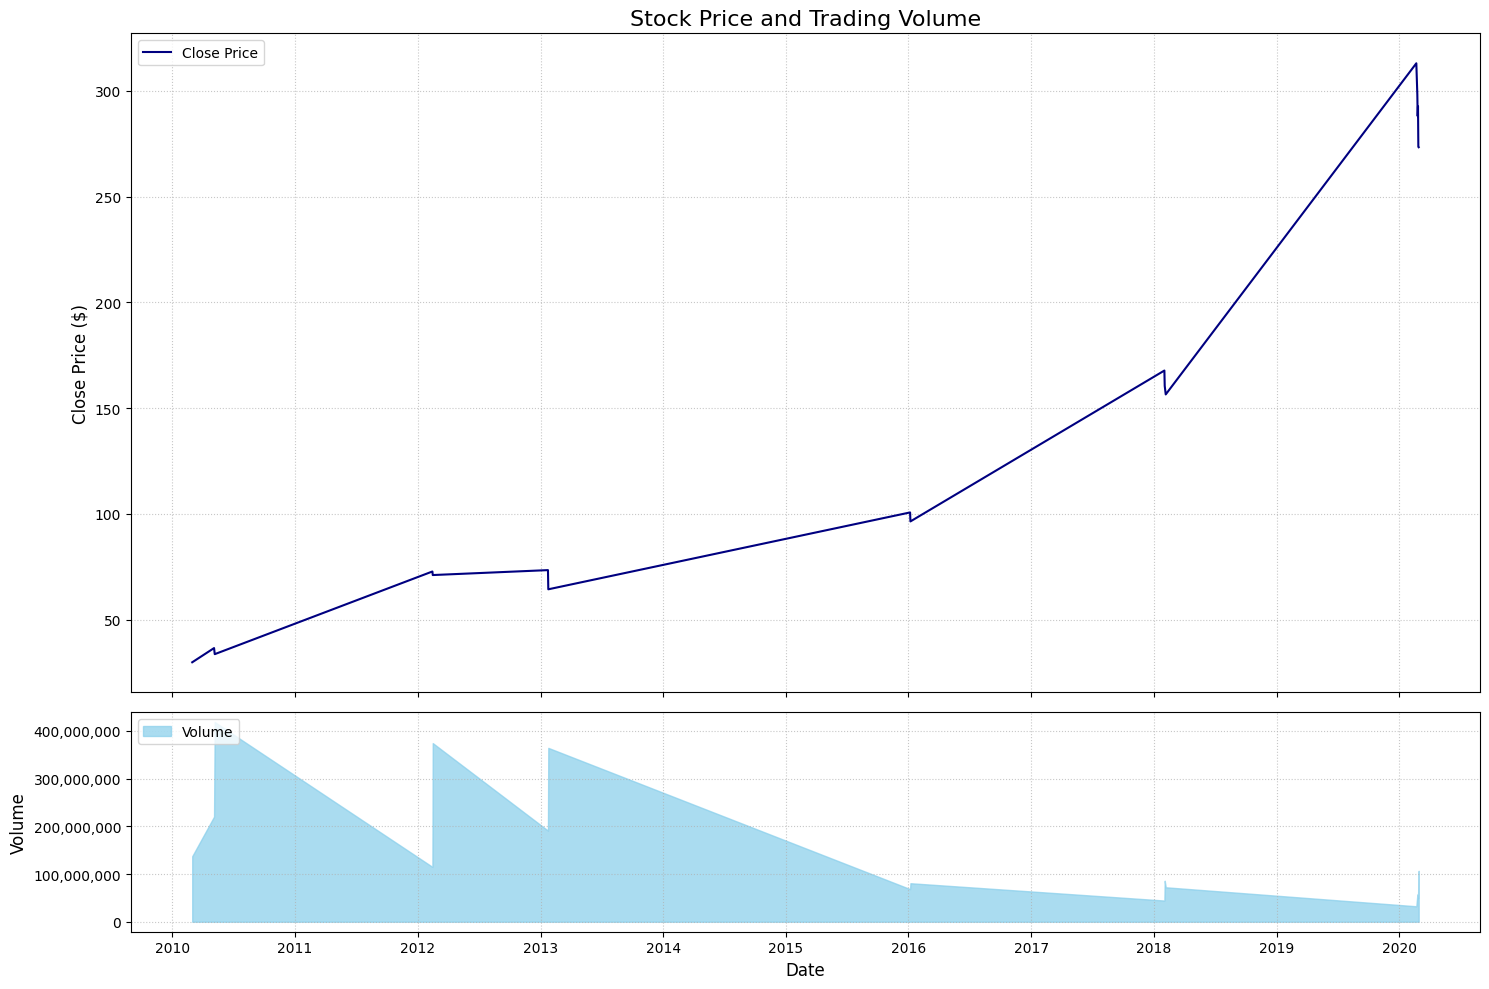

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For better date formatting
import seaborn as sns
import numpy as np
import io # Used to read the string data as if it were a file

# --- Simulating your CSV data (using a smaller, representative part) ---
csv_data_string = """date,close/last,volume,open,high,low
2010-03-01, $29.8557,137312041, $29.3928, $29.9286, $29.35
2010-05-05, $36.5693,220353346, $36.1471, $36.8771, $35.5328
2010-05-06, $35.1786,319584886, $36.2614, $36.8928, $28.4643
2010-05-07, $33.6943,418562326, $34.8157, $35.2243, $32.1728
2012-02-14, $72.78,114963904, $72.0943, $72.7943, $71.7143
2012-02-15, $71.0957,374517892, $73.4657, $75.1843, $70.9843
2013-01-23, $73.4293,191090117, $72.6871, $73.57, $72.11
2013-01-24, $64.3571,364459099, $65.7143, $66.5328, $64.3214
2016-01-06, $100.7,68384270, $100.56, $102.37, $99.87
2016-01-07, $96.45,80742460, $98.68, $100.13, $96.43
2018-02-01, $167.78,44453230, $167.165, $168.62, $166.76
2018-02-02, $160.5,85957050, $166, $166.8, $160.1
2018-02-05, $156.49,72215320, $159.1, $163.88, $156
2020-02-21, $313.05,32426420, $318.62, $320.45, $310.5
2020-02-24, $298.18,55548830, $297.26, $304.18, $289.23
2020-02-25, $288.08,57668360, $300.95, $302.53, $286.13
2020-02-26, $292.65,49678430, $286.53, $297.88, $286.5
2020-02-27, $273.52,80151380, $281.1, $286, $272.96
2020-02-28, $273.36,106721200, $257.26, $278.41, $256.37
"""
# Load the data from the string
df = pd.read_csv(io.StringIO(csv_data_string))
# --- End of data simulation ---

# --- Data Preparation and Cleaning (same as before) ---
df.rename(columns={'close/last': 'close'}, inplace=True)
currency_cols = ['close', 'open', 'high', 'low']
for col in currency_cols:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['volume'] = df['volume'].replace({',': ''}, regex=True).astype(int)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['daily_return'] = df['close'].pct_change() * 100
df['price_range'] = df['high'] - df['low']
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

print("Data prepared. Shape:", df.shape)
print(df.head())

# --- Diverse Visualizations Focusing on Remarkable Changes ---

plt.style.use('seaborn-v0_8-colorblind') # Using a different style for variety

# 1. Bar Chart: Top N Largest Absolute Daily Returns
# This directly shows the days with the most significant single-day price changes.
top_n = 10
df['abs_daily_return'] = df['daily_return'].abs()
largest_changes = df.nlargest(top_n, 'abs_daily_return')

plt.figure(figsize=(12, 7))
bars = plt.bar(largest_changes.index.strftime('%Y-%m-%d'), largest_changes['daily_return'],
               color=['red' if x < 0 else 'green' for x in largest_changes['daily_return']])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.title(f'Top {top_n} Largest Daily Price Changes (%)', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color='black', linewidth=0.8)
for bar in bars: # Add value labels
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + (0.5 if yval > 0 else -1.5), f'{yval:.2f}%', ha='center', va='bottom' if yval > 0 else 'top')
plt.tight_layout()
plt.show()
print(f"\nTop {top_n} largest daily changes:\n", largest_changes[['close', 'daily_return']])


# 2. Scatter Plot: Daily Return vs. Volume
# To see if days with high volume correlate with large price swings.
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['volume'], df['daily_return'],
                      alpha=0.6,
                      c=df['daily_return'], # Color by return value
                      cmap='coolwarm', # Red for negative, Blue for positive
                      s=np.abs(df['daily_return'])*10 + 10) # Size by magnitude of return

plt.xlabel('Volume Traded', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.title('Daily Return vs. Volume Traded', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(df['volume'].mean(), color='grey', linestyle=':', linewidth=0.7, label=f'Avg Volume ({df["volume"].mean():.0f})')
cbar = plt.colorbar(scatter, label='Daily Return (%)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


# 3. Box Plot: Daily Price Range (High-Low) by Year
# Shows how intraday volatility (the daily trading range) has changed over the years.
plt.figure(figsize=(12, 7))
sns.boxplot(x='year', y='price_range', data=df, palette="viridis")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Price Range ($)', fontsize=12)
plt.title('Distribution of Daily Price Ranges by Year', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


# 4. Heatmap: Monthly Volatility (Standard Deviation of Daily Returns)
# Identifies months/years with consistently higher or lower price fluctuations.
df['rolling_volatility_abs'] = df['daily_return'].rolling(window=20).std() # 20-day rolling std dev
monthly_volatility = df.pivot_table(values='rolling_volatility_abs', index='month', columns='year', aggfunc='mean')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_volatility = monthly_volatility.reindex(month_order, axis=0) # Ensure correct month order

if not monthly_volatility.empty:
    plt.figure(figsize=(14, 8))
    sns.heatmap(monthly_volatility, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5,
                cbar_kws={'label': 'Avg. 20-day Rolling Volatility of Returns'})
    plt.title('Heatmap of Average Monthly Stock Volatility', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Month', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to generate monthly volatility heatmap.")

# 5. Candlestick Chart for a specific remarkable period (e.g., around a large drop/gain)
# You might need to install it first: !pip install mplfinance
try:
    import mplfinance as mpf

    mpf_df = df.copy()
    mpf_df.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)

    # Find a period with a significant event, e.g., around the date from `largest_changes`
    if not largest_changes.empty:
        event_date = largest_changes.index[0] # Take the date of the largest change
        start_event_period = event_date - pd.Timedelta(days=15)
        end_event_period = event_date + pd.Timedelta(days=15)

        # Ensure the period is within the data range
        start_event_period = max(start_event_period, mpf_df.index.min())
        end_event_period = min(end_event_period, mpf_df.index.max())

        event_data_subset = mpf_df.loc[start_event_period:end_event_period]

        if not event_data_subset.empty:
            print(f"\nPlotting candlestick around a remarkable event: {start_event_period.date()} to {end_event_period.date()}")
            mpf.plot(event_data_subset,
                     type='candle',
                     style='yahoo', # You can try 'charles', 'mike', 'binance'
                     title=f'Candlestick Chart Around Event ({event_date.date()})',
                     ylabel='Price ($)',
                     volume=True,
                     mav=(5,10), # Short-term moving averages
                     figsize=(15, 9),
                     figratio=(10,6), # Adjust for better aspect ratio
                     addplot=[mpf.make_addplot(event_data_subset['price_range'], panel=2, color='purple', ylabel='Price Range')]) # Add price range to a new panel
        else:
            print("Could not find a suitable event period to plot with candlestick.")
    else:
        print("No significant changes found to center candlestick plot.")

except ImportError:
    print("mplfinance not installed. To install, run: !pip install mplfinance")
except Exception as e:
    print(f"Could not plot candlestick chart: {e}")


# 6. Histogram of Daily Returns with KDE
# Shows the overall distribution of price changes, highlighting frequency of extreme values.
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True, color='teal', stat="density")
plt.title('Distribution of Daily Stock Returns', fontsize=16)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Density', fontsize=12) # Changed to density for KDE overlay
plt.axvline(df['daily_return'].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean Return ({df["daily_return"].mean():.2f}%)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


# 7. Violin Plot: Daily Returns by Day of the Week
# Shows if certain days of the week tend to have higher volatility or different return distributions.
plt.figure(figsize=(12, 7))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] # Saturday, Sunday if applicable
sns.violinplot(x='day_of_week', y='daily_return', data=df, order=day_order, palette='pastel', inner='quartile')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.title('Distribution of Daily Returns by Day of the Week', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Price Line Plot with Volume as an Area Chart (Subplots)
# This gives volume its own distinct visual space while still relating it to price.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Price Plot
ax1.plot(df.index, df['close'], color='navy', label='Close Price')
ax1.set_ylabel('Close Price ($)', fontsize=12)
ax1.set_title('Stock Price and Trading Volume', fontsize=16)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(loc='upper left')

# Volume Plot (Area Chart)
ax2.fill_between(df.index, df['volume'], color='skyblue', alpha=0.7, label='Volume')
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Format y-axis ticks for volume

plt.tight_layout()
plt.show()

Data prepared. Shape: (21, 16)
              close     volume     open     high      low  daily_return  \
date                                                                      
2010-03-01  29.8557  137312041  29.3928  29.9286  29.3500           NaN   
2010-05-05  36.5693  220353346  36.1471  36.8771  35.5328     22.486828   
2010-05-06  35.1786  319584886  36.2614  36.8928  28.4643     -3.802917   
2010-05-07  33.6943  418562326  34.8157  35.2243  32.1728     -4.219327   
2012-02-14  72.7800  114963904  72.0943  72.7943  71.7143    116.000926   

            abs_daily_return  price_range  range_as_pct_of_open      gap  \
date                                                                       
2010-03-01               NaN       0.5786              1.968509      NaN   
2010-05-05         22.486828       1.3443              3.718971   6.2914   
2010-05-06          3.802917       8.4285             23.243725  -0.3079   
2010-05-07          4.219327       3.0515              8.764724

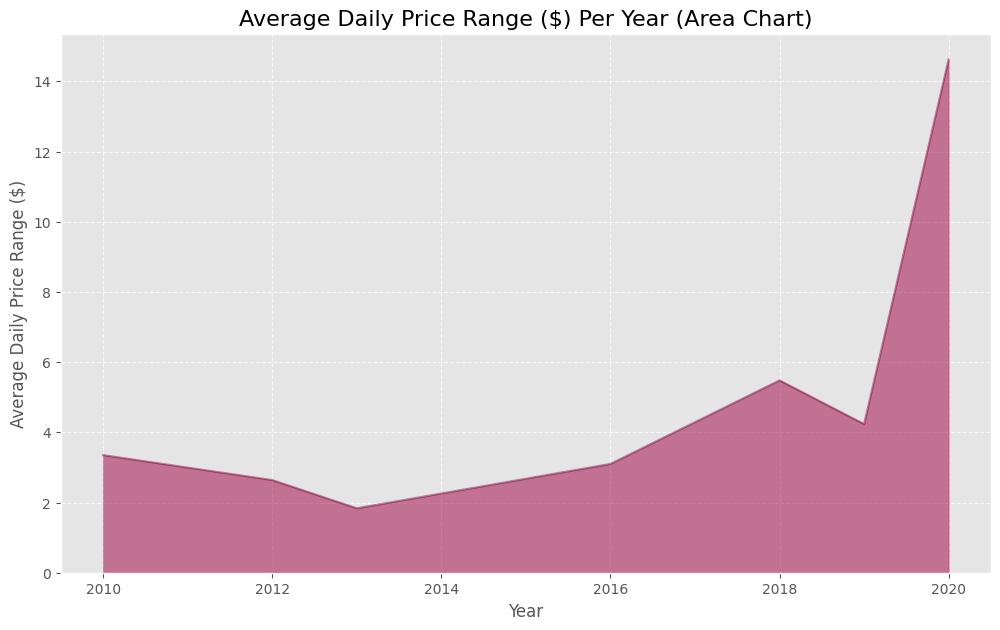

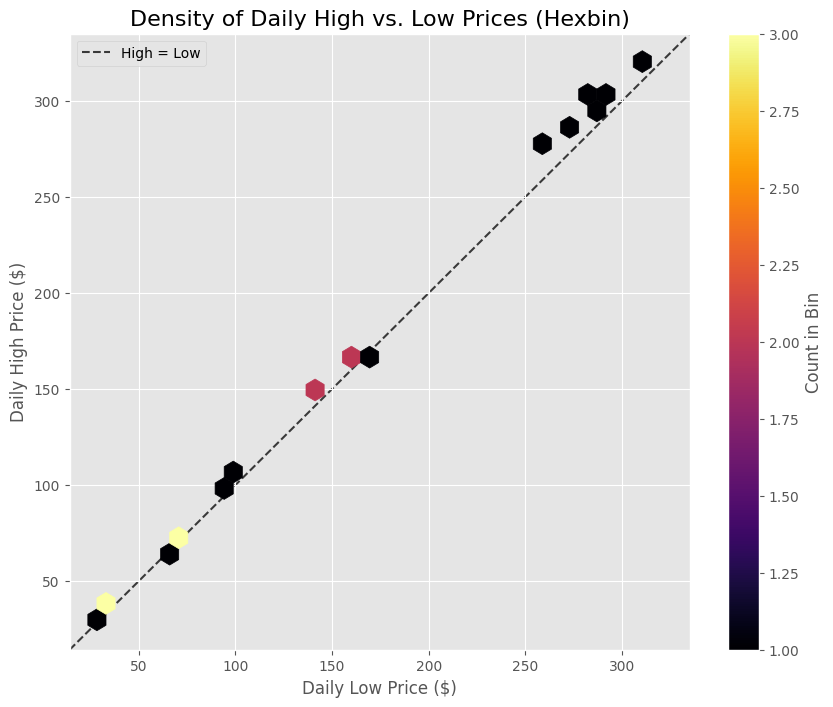

calmap not installed. To install, run: !pip install calmap


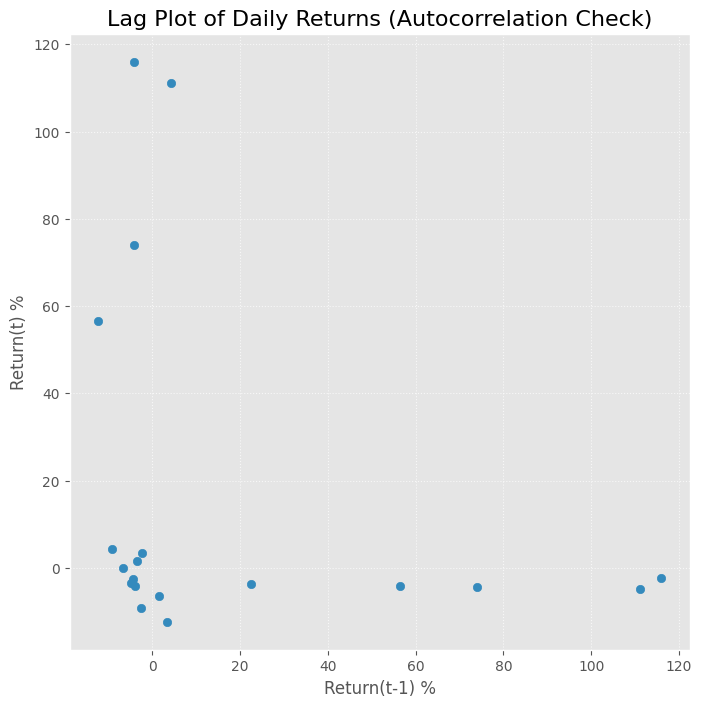

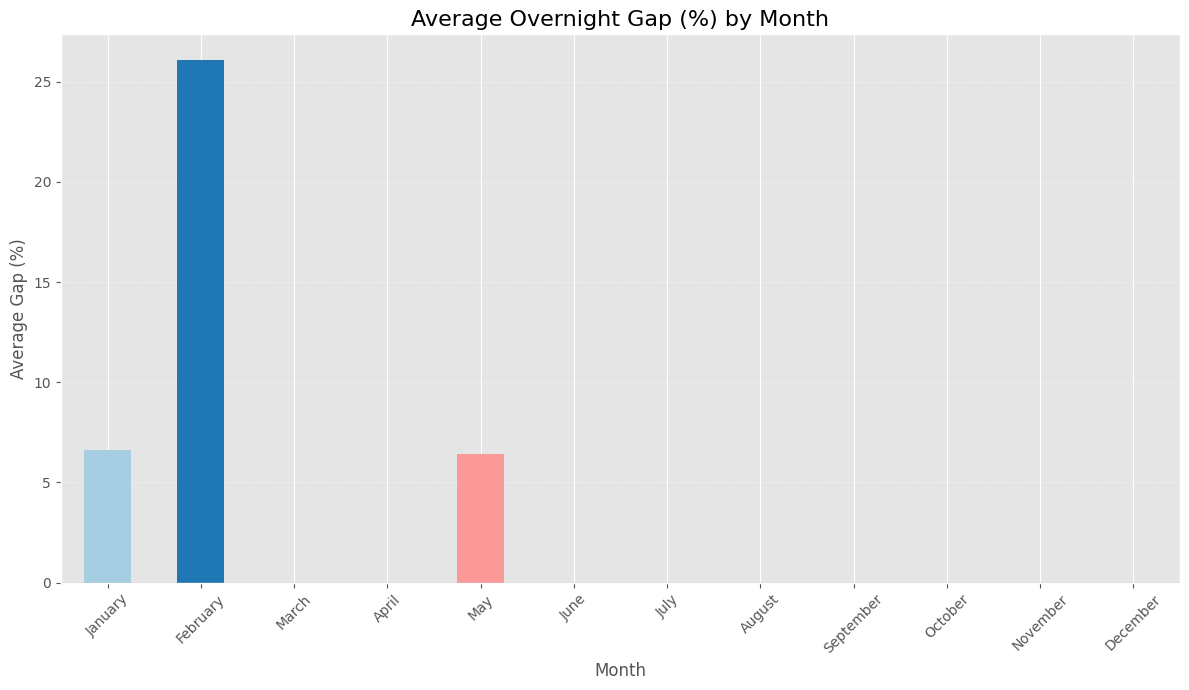

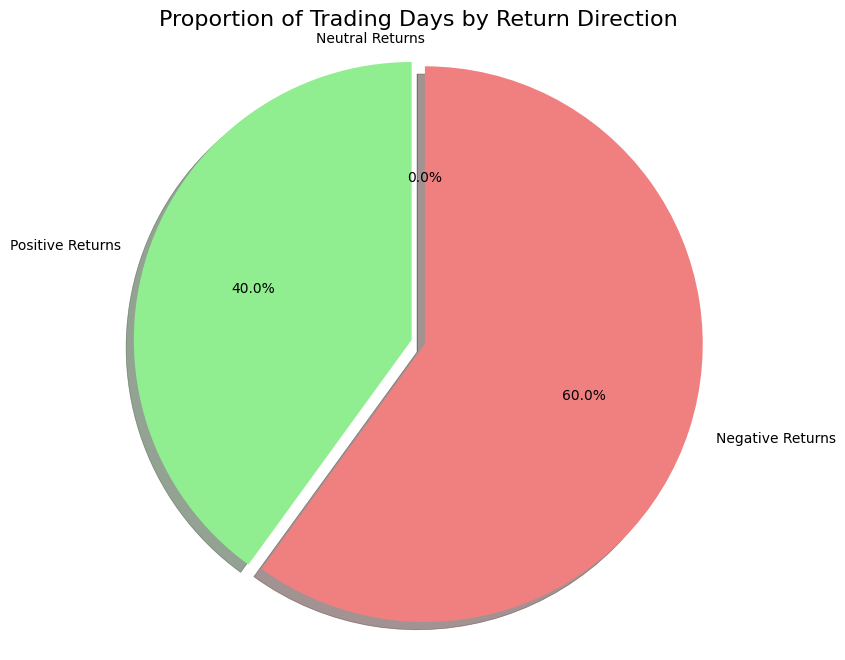

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import io # Used to read the string data as if it were a file

# --- Simulating your CSV data (using a smaller, representative part) ---
csv_data_string = """date,close/last,volume,open,high,low
2010-03-01, $29.8557,137312041, $29.3928, $29.9286, $29.35
2010-05-05, $36.5693,220353346, $36.1471, $36.8771, $35.5328
2010-05-06, $35.1786,319584886, $36.2614, $36.8928, $28.4643
2010-05-07, $33.6943,418562326, $34.8157, $35.2243, $32.1728
2012-02-14, $72.78,114963904, $72.0943, $72.7943, $71.7143
2012-02-15, $71.0957,374517892, $73.4657, $75.1843, $70.9843
2013-01-23, $73.4293,191090117, $72.6871, $73.57, $72.11
2013-01-24, $64.3571,364459099, $65.7143, $66.5328, $64.3214
2016-01-06, $100.7,68384270, $100.56, $102.37, $99.87
2016-01-07, $96.45,80742460, $98.68, $100.13, $96.43
2018-02-01, $167.78,44453230, $167.165, $168.62, $166.76
2018-02-02, $160.5,85957050, $166, $166.8, $160.1
2018-02-05, $156.49,72215320, $159.1, $163.88, $156
2019-01-03, $142.19,91106840, $143.98, $145.72, $142
2019-01-04, $148.26,57423650, $144.53, $148.5499, $143.8
2020-02-21, $313.05,32426420, $318.62, $320.45, $310.5
2020-02-24, $298.18,55548830, $297.26, $304.18, $289.23
2020-02-25, $288.08,57668360, $300.95, $302.53, $286.13
2020-02-26, $292.65,49678430, $286.53, $297.88, $286.5
2020-02-27, $273.52,80151380, $281.1, $286, $272.96
2020-02-28, $273.36,106721200, $257.26, $278.41, $256.37
"""
# Load the data from the string
df = pd.read_csv(io.StringIO(csv_data_string))
# --- End of data simulation ---

# --- Data Preparation and Cleaning (same as before) ---
df.rename(columns={'close/last': 'close'}, inplace=True)
currency_cols = ['close', 'open', 'high', 'low']
for col in currency_cols:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['volume'] = df['volume'].replace({',': ''}, regex=True).astype(int)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# --- Feature Engineering for more interesting plots ---
df['daily_return'] = df['close'].pct_change() * 100
df['abs_daily_return'] = df['daily_return'].abs()
df['price_range'] = df['high'] - df['low'] # Intraday volatility
df['range_as_pct_of_open'] = (df['price_range'] / df['open']) * 100 # Intraday range as % of open
df['gap'] = df['open'] - df['close'].shift(1) # Overnight gap
df['gap_pct'] = (df['gap'] / df['close'].shift(1)) * 100

df['year'] = df.index.year
df['month'] = df.index.month
df['month_name'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()
df['week_of_year'] = df.index.isocalendar().week.astype(int)


print("Data prepared. Shape:", df.shape)
print(df.head())

# --- More Diverse Visualizations Focusing on Remarkable Changes ---

plt.style.use('ggplot') # Yet another style for variety

# 9. Ridgeline Plot (Joy Plot) of Daily Returns by Year
# Shows the distribution of daily returns for each year, allowing comparison of volatility shape.
# Needs `joypy` library: !pip install joypy
try:
    import joypy
    if not df['daily_return'].dropna().empty and len(df['year'].unique()) > 1:
        fig, axes = joypy.joyplot(df.dropna(subset=['daily_return']),
                                  by='year',
                                  column='daily_return',
                                  ylim='own', # Let each year have its own y-axis scale for density
                                  figsize=(10, 7),
                                  alpha=0.7,
                                  colormap=plt.cm.viridis_r, # Example colormap
                                  linewidth=0.5,
                                  legend=False,
                                  title='Distribution of Daily Returns by Year (Ridgeline Plot)')
        plt.xlabel("Daily Return (%)")
        plt.show()
    else:
        print("Not enough data or years to create a ridgeline plot for daily returns.")
except ImportError:
    print("joypy not installed. To install, run: !pip install joypy")
except Exception as e:
    print(f"Could not generate Ridgeline plot: {e}")

# 10. Stacked Area Chart: Composition of Price Range (Low to Open, Open to Close, Close to High)
# This can be a bit complex to interpret for "remarkable changes" but shows intraday dynamics.
# For simplicity, we'll focus on the overall price range for this chart.
# Let's visualize year-over-year average daily price range
avg_yearly_range = df.groupby('year')['price_range'].mean()
if not avg_yearly_range.empty:
    plt.figure(figsize=(12, 7))
    avg_yearly_range.plot(kind='area', stacked=False, alpha=0.5, colormap='Spectral')
    plt.title('Average Daily Price Range ($) Per Year (Area Chart)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Daily Price Range ($)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Not enough data to plot average yearly price range.")

# 11. Hexbin Plot: High vs. Low Prices
# Shows the density of where high and low prices typically occur relative to each other.
# Darker hexbins mean more days had that specific high/low combination.
if len(df) > 20: # Hexbin needs a decent amount of data
    plt.figure(figsize=(10, 8))
    hb = plt.hexbin(df['low'], df['high'], gridsize=30, cmap='inferno', mincnt=1) # mincnt=1 to show all bins with at least 1 point
    cb = plt.colorbar(hb, label='Count in Bin')
    plt.xlabel('Daily Low Price ($)', fontsize=12)
    plt.ylabel('Daily High Price ($)', fontsize=12)
    plt.title('Density of Daily High vs. Low Prices (Hexbin)', fontsize=16)
    # Add a y=x line for reference (where high equals low, though practically impossible)
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='High = Low')
    plt.xlim(lims)
    plt.ylim(lims)
    plt.legend()
    plt.show()
else:
    print("Not enough data points for a meaningful Hexbin plot.")


# 12. Calendar Heatmap of Daily Returns
# Requires `calmap` library: !pip install calmap
# This can reveal patterns of returns across days of the year.
try:
    import calmap
    if not df['daily_return'].dropna().empty:
        plt.figure(figsize=(16, 8)) # Adjust figsize as needed
        # calmap works best with a Series indexed by date
        calmap.yearplot(df['daily_return'], year=df.index.year.max(), cmap='RdYlGn', fillcolor='lightgrey', linewidth=1)
        plt.suptitle(f'Calendar Heatmap of Daily Returns (%) for {df.index.year.max()}', fontsize=16, y=1.02)
        plt.show()

        # If you have multiple years, you might plot the most recent or loop
        if len(df.index.year.unique()) > 1:
            plt.figure(figsize=(16, 8))
            calmap.yearplot(df['daily_return'], year=df.index.year.min(), cmap='RdYlGn', fillcolor='lightgrey', linewidth=1)
            plt.suptitle(f'Calendar Heatmap of Daily Returns (%) for {df.index.year.min()}', fontsize=16, y=1.02)
            plt.show()
    else:
        print("Not enough data to generate a calendar heatmap.")
except ImportError:
    print("calmap not installed. To install, run: !pip install calmap")
except Exception as e:
    print(f"Could not generate Calendar Heatmap: {e}")


# 13. Lag Plot for Daily Returns (Autocorrelation)
# Helps to see if there's a correlation between today's return and yesterday's return.
# A random scatter suggests no simple autocorrelation. Patterns might suggest predictability.
from pandas.plotting import lag_plot
if len(df['daily_return'].dropna()) > 1:
    plt.figure(figsize=(8, 8))
    lag_plot(df['daily_return'], lag=1) # lag=1 means compare with previous day's return
    plt.title('Lag Plot of Daily Returns (Autocorrelation Check)', fontsize=16)
    plt.xlabel('Return(t-1) %', fontsize=12)
    plt.ylabel('Return(t) %', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()
else:
    print("Not enough data for a lag plot.")

# 14. Bar Chart of Average Overnight Gap Percentage by Month
# Shows if certain months tend to have larger positive or negative overnight gaps.
avg_monthly_gap_pct = df.groupby('month_name')['gap_pct'].mean().reindex(month_order, axis=0)
if not avg_monthly_gap_pct.dropna().empty:
    plt.figure(figsize=(12, 7))
    avg_monthly_gap_pct.plot(kind='bar', color=plt.cm.Paired(np.arange(len(avg_monthly_gap_pct))))
    plt.title('Average Overnight Gap (%) by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Gap (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for average monthly gap percentage.")

# 15. Pie Chart: Proportion of Trading Days with Positive vs. Negative Returns
# Gives a high-level view of overall market sentiment for the period.
if not df['daily_return'].dropna().empty:
    positive_days = (df['daily_return'] > 0).sum()
    negative_days = (df['daily_return'] < 0).sum()
    neutral_days = (df['daily_return'] == 0).sum()
    labels = ['Positive Returns', 'Negative Returns', 'Neutral Returns']
    sizes = [positive_days, negative_days, neutral_days]
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    explode = (0.05, 0, 0)  # explode 1st slice (Positive)

    if sum(sizes) > 0: # Ensure there are days to plot
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
        plt.title('Proportion of Trading Days by Return Direction', fontsize=16)
        plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print("No return data to plot for pie chart.")
else:
    print("No daily return data available for pie chart.")

In [ ]:
!pip install pandas matplotlib seaborn statsmodels pmdarima scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 112.7 MB/s eta 0:00:00


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [ ]:
 # Cell 2: Install pmdarima and dependencies using conda
 print("Attempting to install pmdarima and key dependencies using conda...")
 !conda install -c conda-forge numpy pandas statsmodels scikit-learn pmdarima -y


Attempting to install pmdarima and key dependencies using conda...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy
    - pandas
    - pmdarima
    - scikit-learn
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cython-3.1.2               |  py311ha3e34f5_2         3.5 MB  conda-forge
    joblib-1.5.1               |     pyhd8ed1ab_0         219 KB  conda-forge
    libblas-3.9.0              |31_h59b9bed_openblas          16 KB  conda-forge
    libcblas-3.9.0             |31_he106b2a_openblas          16 KB  conda-

In [ ]:

 # Cell 3: Verify pmdarima import
 import sys
 print(f"Python version: {sys.version}")
 successful_import = False
 try:
     import pmdarima
     import numpy
     import pandas
     import statsmodels
     import sklearn # scikit-learn's import name

     print(f"\nSuccessfully imported pmdarima version: {pmdarima.__version__}")
     print(f"NumPy version being used: {numpy.__version__}")
     print(f"Pandas version being used: {pandas.__version__}")
     print(f"Statsmodels version being used: {statsmodels.__version__}")
     print(f"Scikit-learn version being used: {sklearn.__version__}")
     print("\nAll key libraries seem to be imported correctly via conda!")
     successful_import = True
 except ImportError as e:
     print(f"ERROR: Could not import pmdarima or other libraries after conda installation: {e}")
 except Exception as e:
     print(f"An unexpected error occurred during import verification: {e}")

 if not successful_import:
     print("\n--- Troubleshooting Information ---")
     print("If imports failed, consider the following:")
     print("1. Ensure Cell 2 (conda install) completed without errors.")
     print("2. Sometimes, after major conda operations, an additional manual kernel restart helps Colab fully recognize changes:")
     print("   Go to 'Runtime' -> 'Restart runtime...' (Your files will NOT be deleted by this kernel restart).")
     print("   Then, re-run this verification cell (Cell 3).")


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]

Successfully imported pmdarima version: 2.0.4
NumPy version being used: 2.0.2
Pandas version being used: 2.3.0
Statsmodels version being used: 0.14.4
Scikit-learn version being used: 1.7.0

All key libraries seem to be imported correctly via conda!


Dataset loaded successfully.
Original columns: Index(['date', 'close/last', 'volume', 'open', 'high', 'low'], dtype='object')

Time series selected for forecasting ('close' price) with 2518 data points.
date
2010-03-01    29.8557
2010-03-02    29.8357
2010-03-03    29.9043
2010-03-04    30.1014
2010-03-05    31.2786
Name: close, dtype: float64


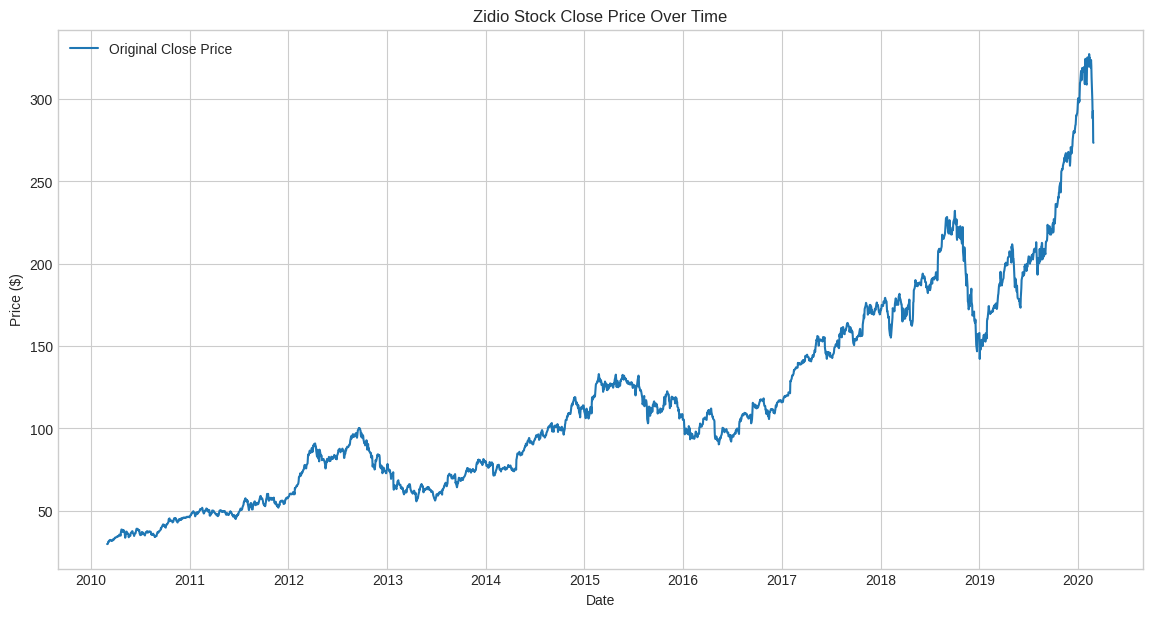


--- Stationarity Check for Original Close Price ---
ADF Statistic: 0.0492
p-value: 0.9624
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Conclusion: Fail to reject the null hypothesis. Original Close Price is likely non-stationary (p-value > 0.05).

Applied first-order differencing (d=1).

--- Stationarity Check for 1st Differenced Close Price ---
ADF Statistic: -7.2256
p-value: 0.0000
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Conclusion: Reject the null hypothesis. 1st Differenced Close Price is likely stationary (p-value <= 0.05).


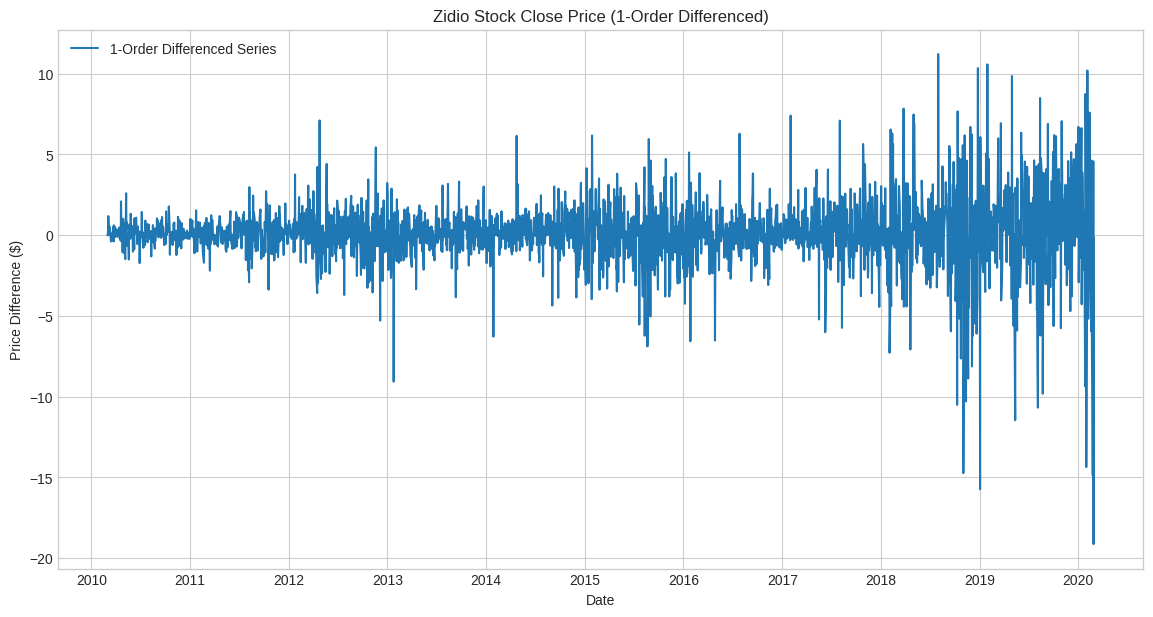

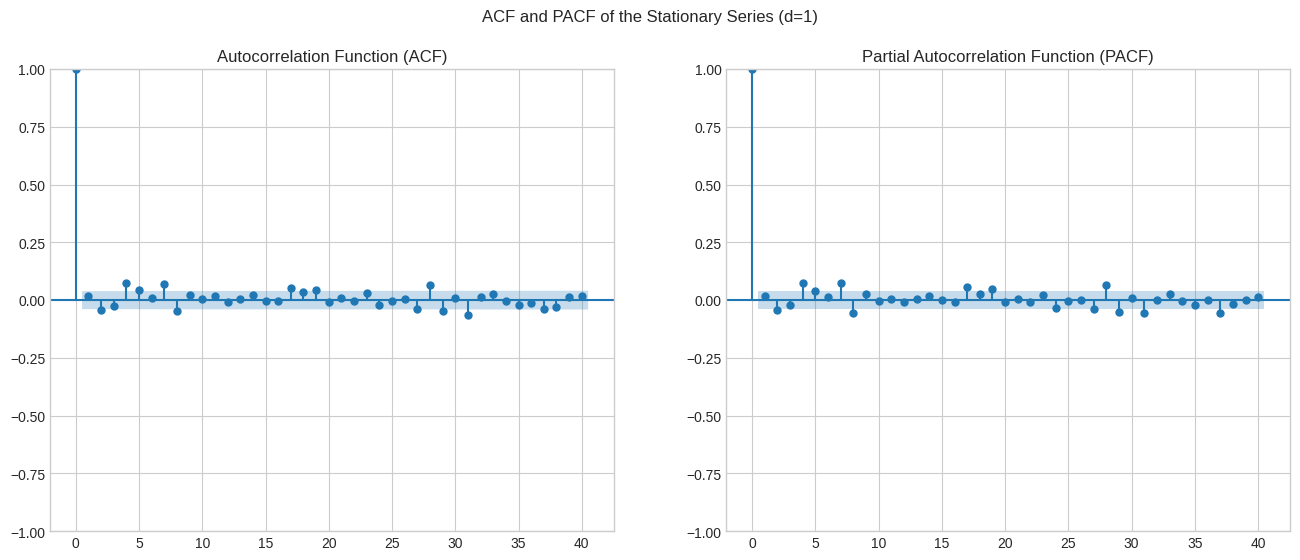

Review ACF/PACF plots: 
- PACF cut-off suggests 'p'. 
- ACF cut-off suggests 'q'.

--- Fitting ARIMA model using auto_arima (this may take some time) ---
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10873.891, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10875.177, Time=0.13 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10875.115, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10877.244, Time=0.10 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10876.384, Time=1.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.818 seconds

--- Auto ARIMA Model Summary ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5434.946
Date:                Mon, 16 Jun 2025   AIC                          10873.891
Time:                        05:58:41   BIC                          10885.553
Sample:                             0   HQIC                         10878.123
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0967      0.043

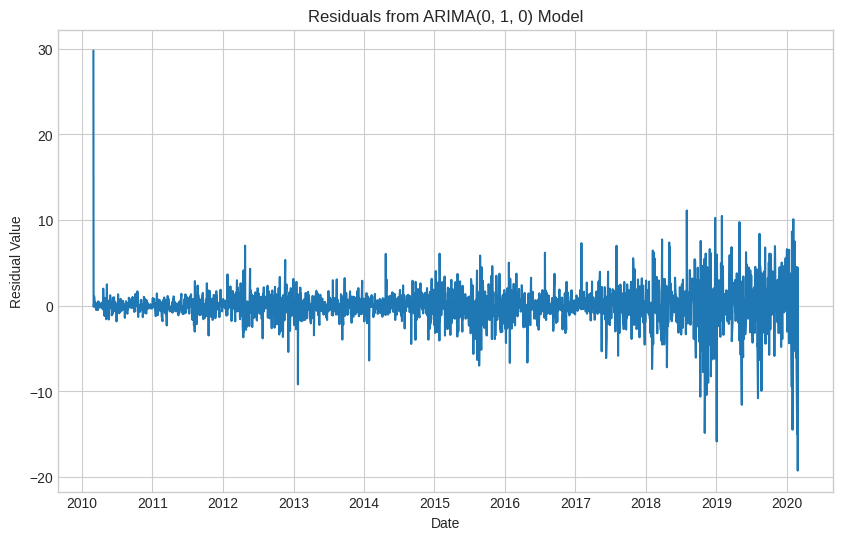

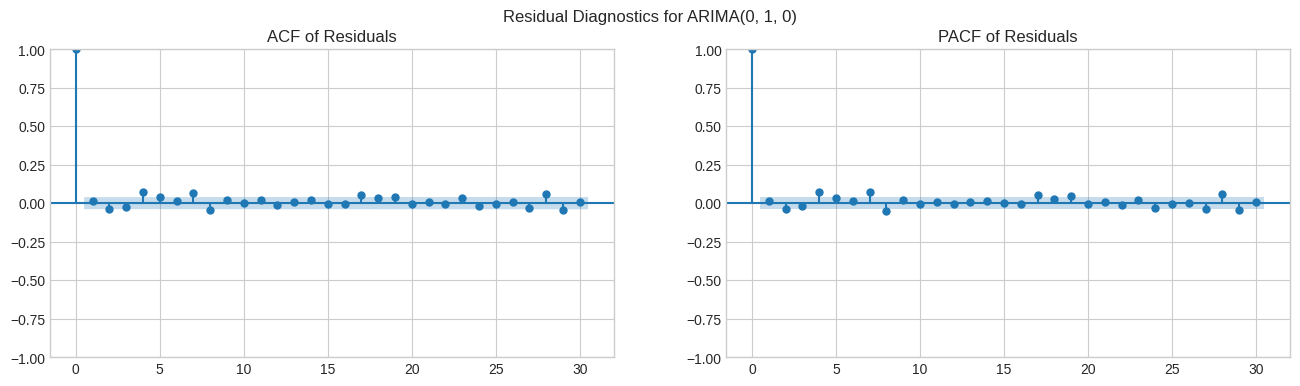

Residuals should ideally be white noise (no significant spikes in ACF/PACF).

--- Evaluating Model with Train-Test Split ---
Training on 2014 data points, Testing on 504 data points.

ARIMA(0, 1, 0) model refitted on the training data.

Test Set Evaluation Metrics for ARIMA(0, 1, 0):
  RMSE: 52.1655
  MAE:  36.3324


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

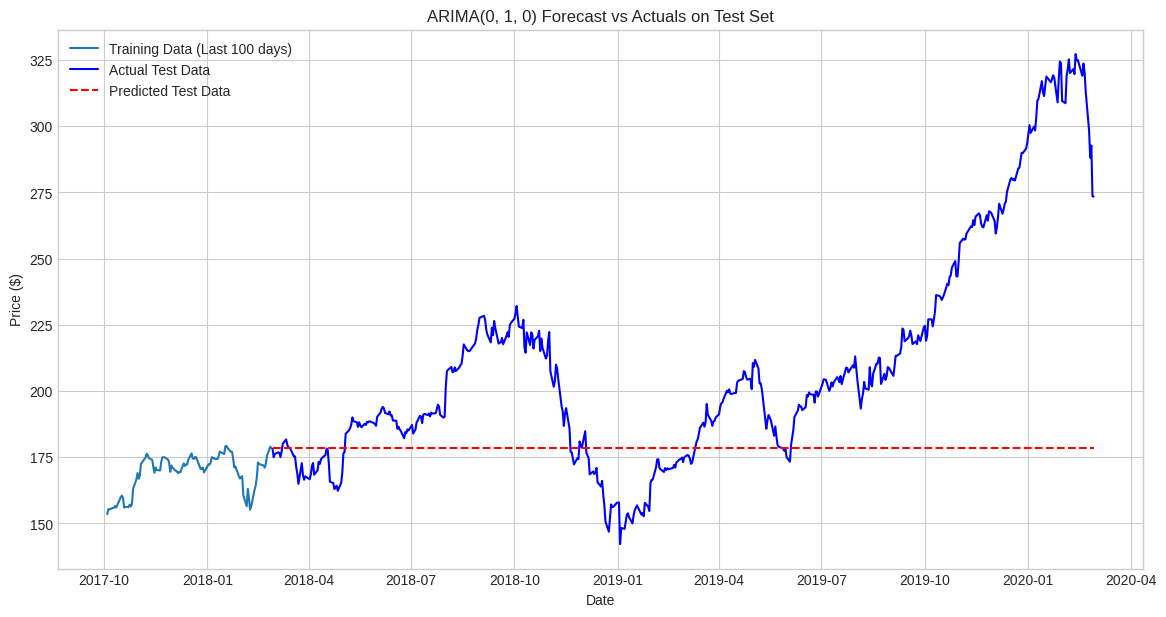


--- Making Future Forecasts ---
Final ARIMA(0, 1, 0) model fitted on the entire dataset.

Forecast for the next 30 business days:
2020-03-02    273.36
2020-03-03    273.36
2020-03-04    273.36
2020-03-05    273.36
2020-03-06    273.36
2020-03-09    273.36
2020-03-10    273.36
2020-03-11    273.36
2020-03-12    273.36
2020-03-13    273.36
2020-03-16    273.36
2020-03-17    273.36
2020-03-18    273.36
2020-03-19    273.36
2020-03-20    273.36
2020-03-23    273.36
2020-03-24    273.36
2020-03-25    273.36
2020-03-26    273.36
2020-03-27    273.36
2020-03-30    273.36
2020-03-31    273.36
2020-04-01    273.36
2020-04-02    273.36
2020-04-03    273.36
2020-04-06    273.36
2020-04-07    273.36
2020-04-08    273.36
2020-04-09    273.36
2020-04-10    273.36
Freq: B, dtype: float64


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

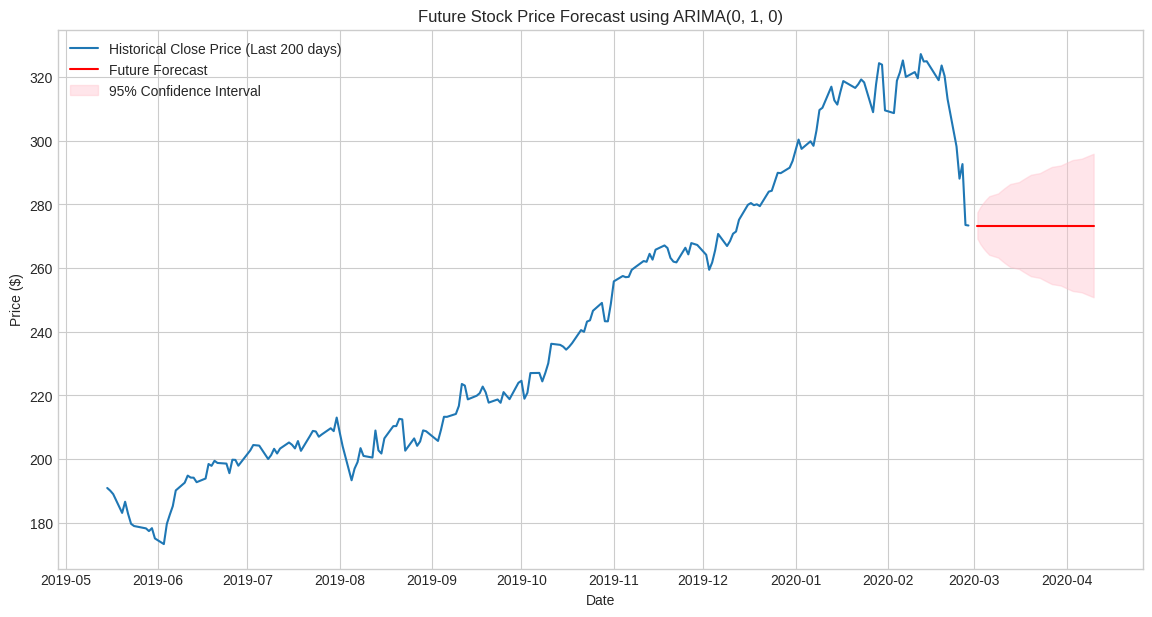


--- ARIMA Modeling Complete ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import for time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima # For automatic order selection

# Import for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Load and Prepare the Data ---
try:
    # ** IMPORTANT: Make sure 'zidio_cleaned.csv' is uploaded to your Colab session **
    df = pd.read_csv('zidio_cleaned.csv')
    print("Dataset loaded successfully.")
    print("Original columns:", df.columns)
except FileNotFoundError:
    print("Error: 'zidio_cleaned.csv' not found. Please upload the file to your Colab session.")
    exit() # Exit if file not found

# Basic Data Cleaning and Preparation (as done before)
if 'close/last' in df.columns:
    df.rename(columns={'close/last': 'close'}, inplace=True)
else:
    print("Warning: 'close/last' column not found. Assuming 'close' column exists.")
    if 'close' not in df.columns:
        print("Error: Neither 'close/last' nor 'close' column found. Please check your CSV.")
        exit()

# Ensure 'close' column is numeric, removing '$' if present
if df['close'].dtype == 'object':
    df['close'] = df['close'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_index() # Crucial for time series

# Select the target series for forecasting
series_to_forecast = df['close'].dropna() # Use dropna() just in case

if series_to_forecast.empty:
    print("Error: The 'close' price series is empty after processing. Check your data.")
    exit()

print(f"\nTime series selected for forecasting ('close' price) with {len(series_to_forecast)} data points.")
print(series_to_forecast.head())

# --- 2. Visualize the Time Series ---
plt.figure(figsize=(14, 7))
plt.plot(series_to_forecast, label='Original Close Price')
plt.title('Zidio Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# --- 3. Check for Stationarity ---
def check_stationarity(timeseries, series_name="Time Series"):
    """Performs ADF test and prints results."""
    print(f"\n--- Stationarity Check for {series_name} ---")
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] <= 0.05:
        print(f"Conclusion: Reject the null hypothesis. {series_name} is likely stationary (p-value <= 0.05).")
        return True
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. {series_name} is likely non-stationary (p-value > 0.05).")
        return False

is_stationary_original = check_stationarity(series_to_forecast, "Original Close Price")
d_order = 0 # Initialize differencing order

if not is_stationary_original:
    # Try first-order differencing
    series_diff1 = series_to_forecast.diff().dropna()
    d_order = 1
    print(f"\nApplied first-order differencing (d={d_order}).")
    is_stationary_diff1 = check_stationarity(series_diff1, "1st Differenced Close Price")

    if not is_stationary_diff1:
        # Try second-order differencing if first wasn't enough
        series_diff2 = series_diff1.diff().dropna()
        d_order = 2
        print(f"\nApplied second-order differencing (d={d_order}).")
        check_stationarity(series_diff2, "2nd Differenced Close Price")
        stationary_series_for_acf_pacf = series_diff2
    else:
        stationary_series_for_acf_pacf = series_diff1
else:
    stationary_series_for_acf_pacf = series_to_forecast # Original series is stationary

# Plot the stationary series (if differenced)
if d_order > 0:
    plt.figure(figsize=(14, 7))
    plt.plot(stationary_series_for_acf_pacf, label=f'{d_order}-Order Differenced Series')
    plt.title(f'Zidio Stock Close Price ({d_order}-Order Differenced)')
    plt.xlabel('Date')
    plt.ylabel('Price Difference ($)')
    plt.legend()
    plt.show()

# --- 4. Determine AR (p) and MA (q) orders using ACF and PACF ---
# Plot ACF and PACF for the stationary series
if len(stationary_series_for_acf_pacf) > 20 : # Need enough data points for ACF/PACF
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(stationary_series_for_acf_pacf, ax=axes[0], lags=min(40, len(stationary_series_for_acf_pacf)//2 -1))
    axes[0].set_title('Autocorrelation Function (ACF)')
    plot_pacf(stationary_series_for_acf_pacf, ax=axes[1], lags=min(40, len(stationary_series_for_acf_pacf)//2 -1), method='ywm')
    axes[1].set_title('Partial Autocorrelation Function (PACF)')
    plt.suptitle(f'ACF and PACF of the Stationary Series (d={d_order})')
    plt.show()
    print("Review ACF/PACF plots: \n- PACF cut-off suggests 'p'. \n- ACF cut-off suggests 'q'.")
else:
    print("Not enough data points in the stationary series to plot meaningful ACF/PACF.")


# --- 5. Fit ARIMA Model using auto_arima ---
# auto_arima will help find the best (p,d,q) and also considers stationarity.
print("\n--- Fitting ARIMA model using auto_arima (this may take some time) ---")
# Use a smaller portion for auto_arima if dataset is very large, for faster initial results
# For full dataset, allow it more time.
# We pass the original series, auto_arima will determine 'd' or use the one we suggest.
try:
    auto_model = auto_arima(series_to_forecast,
                            start_p=0, start_q=0,    # Initial guess for p and q
                            max_p=5, max_q=5,        # Maximum p and q to test
                            d=None,                  # Let auto_arima determine 'd', or set d=d_order if confident
                            seasonal=False,          # Assuming no seasonality for daily stock data
                            stepwise=True,           # Use stepwise algorithm to find best model faster
                            suppress_warnings=True,
                            trace=True,              # Print status of fits
                            error_action='ignore')   # Skip models that fail to fit

    print("\n--- Auto ARIMA Model Summary ---")
    print(auto_model.summary())
    best_order = auto_model.order
    print(f"Best ARIMA order found by auto_arima: (p,d,q) = {best_order}")

    # Plot residuals
    residuals = pd.Series(auto_model.resid(), index=series_to_forecast.index[-len(auto_model.resid()):])
    plt.figure(figsize=(10,6))
    plt.plot(residuals)
    plt.title(f'Residuals from ARIMA{best_order} Model')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    plot_acf(residuals, ax=axes[0], lags=min(30, len(residuals)//2 -1))
    axes[0].set_title('ACF of Residuals')
    plot_pacf(residuals, ax=axes[1], lags=min(30, len(residuals)//2 -1), method='ywm')
    axes[1].set_title('PACF of Residuals')
    plt.suptitle(f'Residual Diagnostics for ARIMA{best_order}')
    plt.show()
    print("Residuals should ideally be white noise (no significant spikes in ACF/PACF).")

except Exception as e:
    print(f"An error occurred during auto_arima fitting: {e}")
    auto_model = None # Ensure auto_model is None if fitting fails

# --- 6. Train-Test Split for Model Evaluation ---
print("\n--- Evaluating Model with Train-Test Split ---")
if auto_model:
    n_total = len(series_to_forecast)
    n_train = int(n_total * 0.8) # 80% for training
    n_test = n_total - n_train

    if n_train < 50 or n_test < 10: # Check if there's enough data for a meaningful split
        print("Warning: Not enough data for a robust train-test split and evaluation. Skipping this part.")
        train_series = series_to_forecast # Use all data for final forecast if split is too small
        test_series = pd.Series([]) # Empty test series
    else:
        train_series = series_to_forecast[:n_train]
        test_series = series_to_forecast[n_train:]
        print(f"Training on {len(train_series)} data points, Testing on {len(test_series)} data points.")

        # Re-fit the model determined by auto_arima on the training set
        # (or fit a new auto_arima if you prefer, but using best_order is faster)
        model_for_eval = ARIMA(train_series, order=best_order)
        fitted_eval_model = model_for_eval.fit()
        print(f"\nARIMA{best_order} model refitted on the training data.")

        # Make predictions on the test set
        # The 'start' and 'end' parameters for predict are 0-based index relative to the train_series
        predictions_on_test = fitted_eval_model.predict(start=len(train_series),
                                                        end=len(train_series) + len(test_series) - 1,
                                                        dynamic=False) # dynamic=False uses actuals up to t-1 for multi-step
        predictions_on_test.index = test_series.index # Align index for plotting and metrics

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(test_series, predictions_on_test))
        mae = mean_absolute_error(test_series, predictions_on_test)
        print(f"\nTest Set Evaluation Metrics for ARIMA{best_order}:")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE:  {mae:.4f}")

        # Plot actual vs. predicted for the test set
        plt.figure(figsize=(14, 7))
        plt.plot(train_series.tail(100), label='Training Data (Last 100 days)') # Show some recent training data
        plt.plot(test_series, label='Actual Test Data', color='blue')
        plt.plot(predictions_on_test, label='Predicted Test Data', color='red', linestyle='--')
        plt.title(f'ARIMA{best_order} Forecast vs Actuals on Test Set')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend()
        plt.show()
else:
    print("auto_arima model fitting failed. Skipping train-test evaluation.")
    train_series = series_to_forecast # Use all data for final forecast
    test_series = pd.Series([])

# --- 7. Make Future Forecasts ---
if auto_model:
    print("\n--- Making Future Forecasts ---")
    n_periods_future = 30 # Number of future periods to forecast (e.g., 30 business days)

    # Fit the final model on the ENTIRE dataset (or just training if preferred for consistency with evaluation)
    # For future forecasts, it's common to use all available historical data.
    final_model = ARIMA(series_to_forecast, order=best_order) # Using all historical data
    fitted_final_model = final_model.fit()
    print(f"Final ARIMA{best_order} model fitted on the entire dataset.")

    # Forecast future values
    forecast_object = fitted_final_model.get_forecast(steps=n_periods_future)
    future_forecast_values = forecast_object.predicted_mean
    confidence_intervals = forecast_object.conf_int()

    # Create an index for the forecasted period
    last_date = series_to_forecast.index[-1]
    future_forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                          periods=n_periods_future,
                                          freq='B') # 'B' for business day frequency

    future_forecast_series = pd.Series(future_forecast_values.values, index=future_forecast_index)
    confidence_intervals.index = future_forecast_index

    print(f"\nForecast for the next {n_periods_future} business days:")
    print(future_forecast_series)

    # Plot the historical data and the future forecast
    plt.figure(figsize=(14, 7))
    plt.plot(series_to_forecast.tail(200), label='Historical Close Price (Last 200 days)')
    plt.plot(future_forecast_series, label='Future Forecast', color='red')
    plt.fill_between(future_forecast_index,
                     confidence_intervals.iloc[:, 0], # Lower bound
                     confidence_intervals.iloc[:, 1], # Upper bound
                     color='pink', alpha=0.4, label='95% Confidence Interval')
    plt.title(f'Future Stock Price Forecast using ARIMA{best_order}')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()
else:
    print("auto_arima model fitting failed. Skipping future forecasts.")

print("\n--- ARIMA Modeling Complete ---")

<ipython-input-5-52966748>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean(numeric_only=True)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3

ADF Statistic: 4.793736184567422
p-value: 1.0
❌ Series is not stationary; differencing will be handled by the model
                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                    8
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Mon, 16 Jun 2025   AIC                             10.000
Time:                                    05:58:50   BIC                                nan
Sample:                                         0   HQIC                               nan
                                              - 8                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

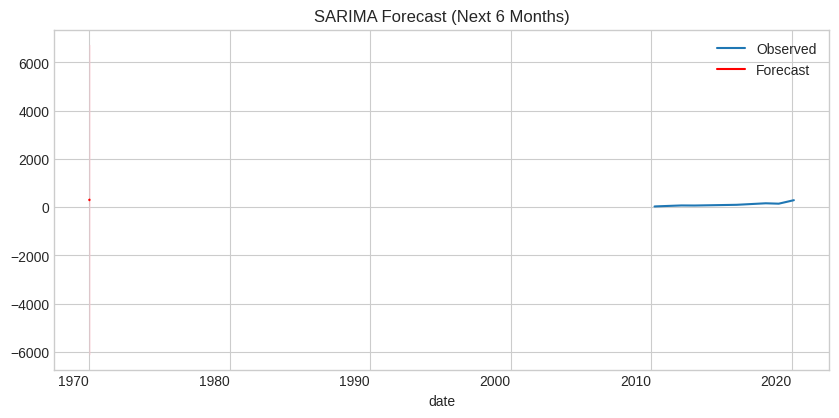


Forecasted Close Prices:
8     289.806667
9     289.806667
10    289.806667
11    289.806667
12    309.710467
13    315.002167
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import io

# Simulated dataset
csv_data_string = """date,close/last,volume,open,high,low
2010-03-01, $29.8557,137312041, $29.3928, $29.9286, $29.35
2010-05-05, $36.5693,220353346, $36.1471, $36.8771, $35.5328
2010-05-06, $35.1786,319584886, $36.2614, $36.8928, $28.4643
2010-05-07, $33.6943,418562326, $34.8157, $35.2243, $32.1728
2012-02-14, $72.78,114963904, $72.0943, $72.7943, $71.7143
2012-02-15, $71.0957,374517892, $73.4657, $75.1843, $70.9843
2013-01-23, $73.4293,191090117, $72.6871, $73.57, $72.11
2013-01-24, $64.3571,364459099, $65.7143, $66.5328, $64.3214
2016-01-06, $100.7,68384270, $100.56, $102.37, $99.87
2016-01-07, $96.45,80742460, $98.68, $100.13, $96.43
2018-02-01, $167.78,44453230, $167.165, $168.62, $166.76
2018-02-02, $160.5,85957050, $166, $166.8, $160.1
2018-02-05, $156.49,72215320, $159.1, $163.88, $156
2019-01-03, $142.19,91106840, $143.98, $145.72, $142
2019-01-04, $148.26,57423650, $144.53, $148.5499, $143.8
2020-02-21, $313.05,32426420, $318.62, $320.45, $310.5
2020-02-24, $298.18,55548830, $297.26, $304.18, $289.23
2020-02-25, $288.08,57668360, $300.95, $302.53, $286.13
2020-02-26, $292.65,49678430, $286.53, $297.88, $286.5
2020-02-27, $273.52,80151380, $281.1, $286, $272.96
2020-02-28, $273.36,106721200, $257.26, $278.41, $256.37
"""
df = pd.read_csv(io.StringIO(csv_data_string))

# Clean and convert data
df.rename(columns={'close/last': 'close'}, inplace=True)
for col in ['close', 'open', 'high', 'low']:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['volume'] = df['volume'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample to monthly average closing price
monthly_df = df.resample('M').mean(numeric_only=True)
monthly_df.dropna(subset=['close'], inplace=True)

# ADF stationarity test
adf_result = adfuller(monthly_df['close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("✅ Series is stationary")
else:
    print("❌ Series is not stationary; differencing will be handled by the model")

# Fit SARIMA model
model = SARIMAX(monthly_df['close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()
print(results.summary())

# Forecast next 6 months
forecast = results.get_forecast(steps=6)
forecast_ci = forecast.conf_int()

# Plot forecast
ax = monthly_df['close'].plot(label='Observed', figsize=(10, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color='pink', alpha=0.3)
plt.title("SARIMA Forecast (Next 6 Months)")
plt.legend()
plt.show()

# Print forecasted values
print("\nForecasted Close Prices:")
print(forecast.predicted_mean)


Dataset loaded successfully.

Time series selected for forecasting ('close' price) with 2518 data points.


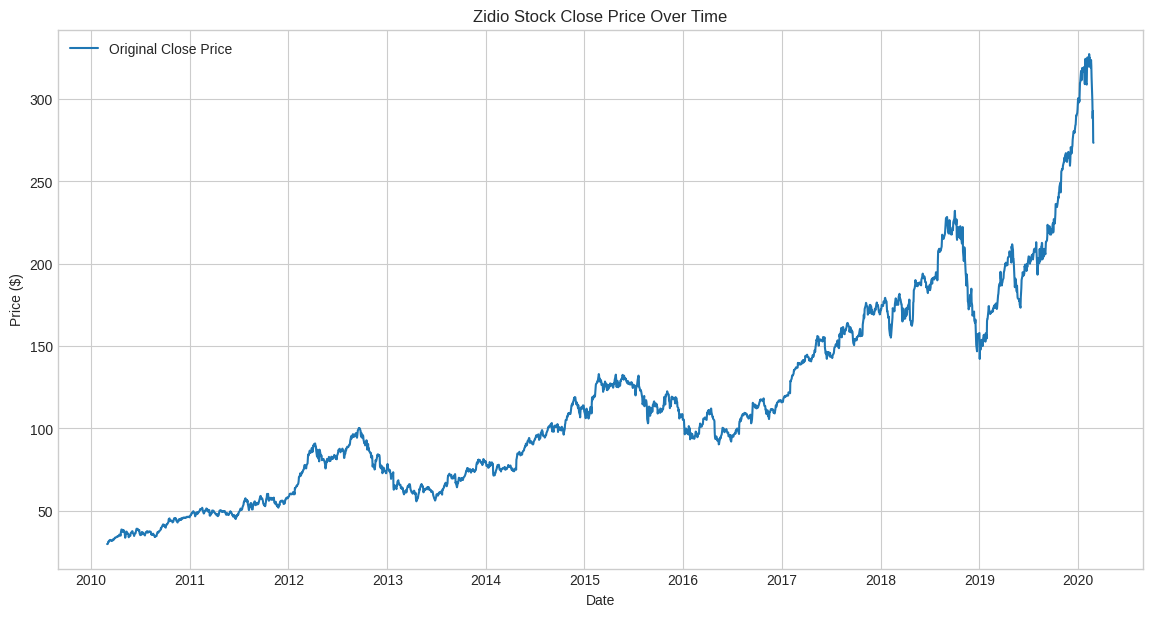


Assuming a seasonal period (m) of 5 for potential weekly patterns.

--- Fitting SARIMA model using auto_arima (this may take significantly longer than non-seasonal ARIMA) ---
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=10873.891, Time=0.11 sec


/usr/local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will 

 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=10872.472, Time=0.63 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=10872.460, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=10877.244, Time=0.08 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=10875.115, Time=0.36 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=10874.429, Time=1.13 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=10874.419, Time=1.28 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=10872.433, Time=0.57 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[5] intercept   : AIC=10874.427, Time=1.63 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[5] intercept   : AIC=10876.428, Time=3.05 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=10870.902, Time=0.46 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[5] intercept   : AIC=10872.891, Time=0.91 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=10872.894, Time=1.26 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=10870.936, Time=0.51 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[5] intercept   : AIC=10874.892, Time=1.25 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=10873.768, Time=1.79 sec
 ARIMA(0,1,0)(1,0,0)[5]             : AIC=10873.695, Time=0.18 sec

Best model:  ARIMA(0,1,0)(1,0,0)[5] intercept
Total fit time: 16.184 seconds

--- Auto SARIMA Model Summary ---
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2518
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 5)   Log Likelihood               -5432.451
Date:                           Mon, 16 Jun 2025   AIC                          10870.902
Time:                                   14:09:17   BIC                          10888.395
Sample:                                        0   HQIC                         10877.250
                                          - 2518                                         
Covariance Type:                             opg                                         
                 coef    std err 

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


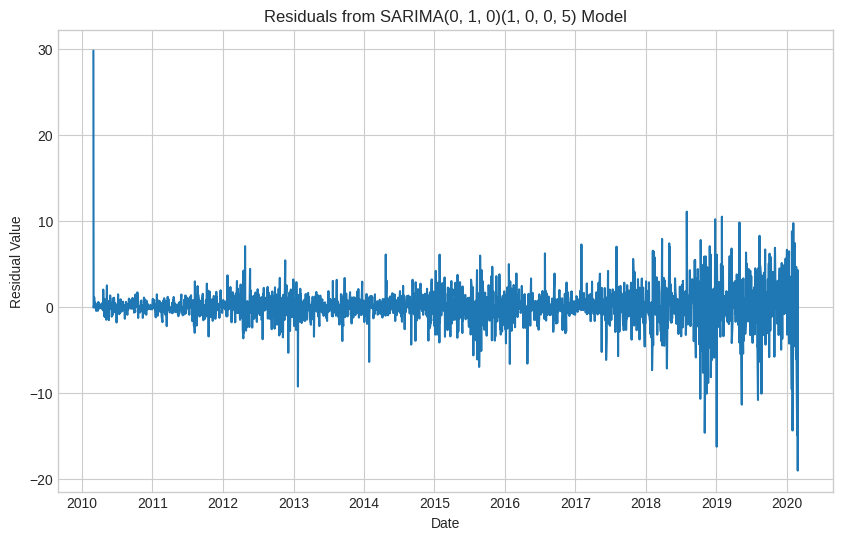

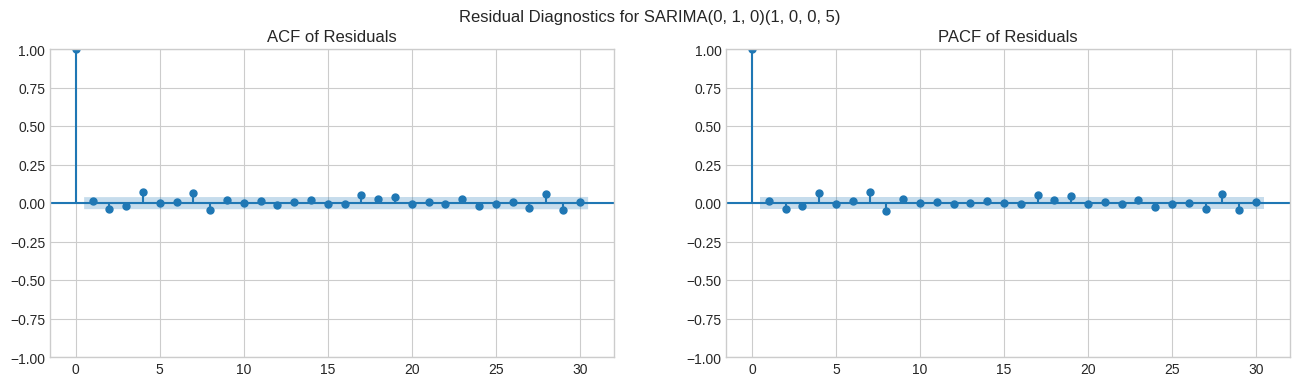

Residuals should ideally be white noise (no significant spikes in ACF/PACF).

--- Evaluating SARIMA Model with Train-Test Split ---
Training on 2014 data points, Testing on 504 data points.

Attempting to fit/refit SARIMA model on the training set for evaluation...


/usr/local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will 

Successfully refitted model on training data: SARIMA(2, 1, 0)(1, 0, 1, 5)

--- Debugging Information ---
Shape of test_series: (504,)
Shape of predictions_on_test_series: (504,)
Data type of test_series: float64
Data type of predictions_on_test_series: float64

First 5 values of test_series:
date
2018-02-28    178.12
2018-03-01    175.00
2018-03-02    176.21
2018-03-05    176.82
2018-03-06    176.67
Name: close, dtype: float64

First 5 values of predictions_on_test_series:
date
2018-02-28   NaN
2018-03-01   NaN
2018-03-02   NaN
2018-03-05   NaN
2018-03-06   NaN
dtype: float64

NaN count in test_series: 0
NaN count in predictions_on_test_series: 504
ERROR: NaNs detected in predictions_on_test_series. Evaluation metrics cannot be calculated.
Indices with NaN predictions: DatetimeIndex(['2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05',
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13',
               ...
               '

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.p

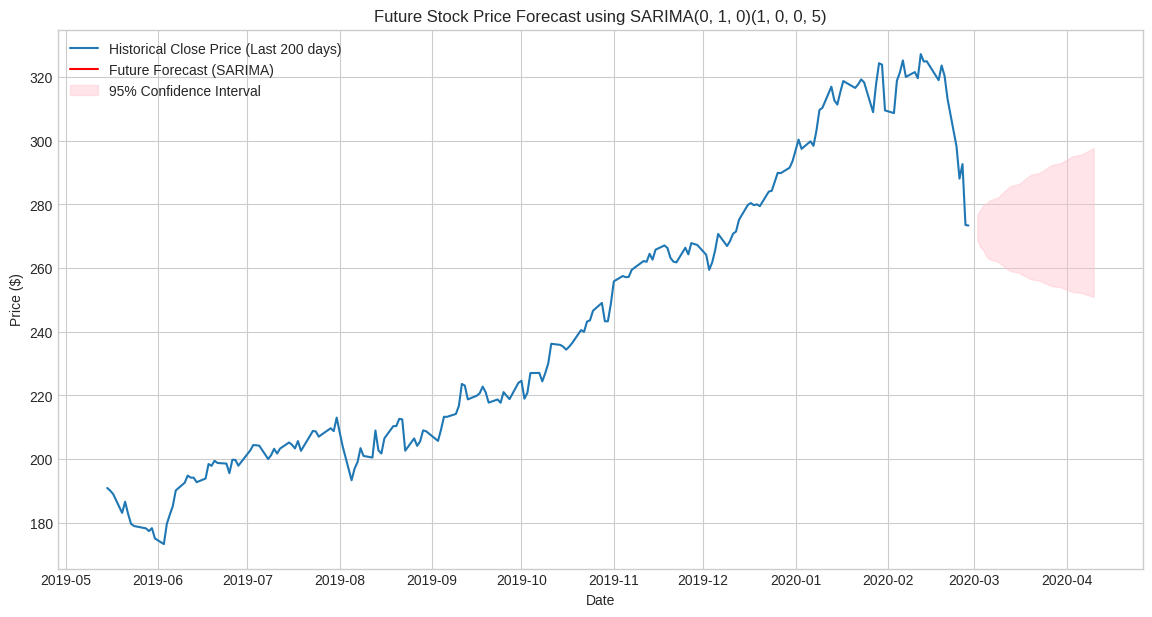


--- SARIMA Modeling Complete ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import for time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX # For manual SARIMA if needed
from pmdarima import auto_arima # For automatic order selection

# Import for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Load and Prepare the Data ---
try:
    # ** IMPORTANT: Make sure 'zidio_cleaned.csv' is uploaded to your Colab session **
    df = pd.read_csv('zidio_cleaned.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'zidio_cleaned.csv' not found. Please upload the file to your Colab session.")
    exit()

# Basic Data Cleaning and Preparation
if 'close/last' in df.columns:
    df.rename(columns={'close/last': 'close'}, inplace=True)
else:
    if 'close' not in df.columns:
        print("Error: Neither 'close/last' nor 'close' column found. Please check your CSV.")
        exit()

if df['close'].dtype == 'object':
    df['close'] = df['close'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_index()

series_to_forecast = df['close'].dropna()

if series_to_forecast.empty:
    print("Error: The 'close' price series is empty after processing. Check your data.")
    exit()

print(f"\nTime series selected for forecasting ('close' price) with {len(series_to_forecast)} data points.")

# 2. Visualize the Time Series (already done in ARIMA, can skip if desired) ---
plt.figure(figsize=(14, 7))
plt.plot(series_to_forecast, label='Original Close Price')
plt.title('Zidio Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# --- 3. Determine Seasonal Period 'm' ---
# For daily stock data, common choices for 'm' to explore weekly patterns are 5 (business days) or 7 (calendar days).
# For this example, let's assume a weekly seasonality with m=5.
# If you suspect other seasonalities (e.g., monthly m=21, yearly m=252), adjust accordingly.
# Note: Yearly seasonality (m=252) can be computationally intensive and might require very long data.
M_PERIOD = 5 # Assuming weekly seasonality (5 trading days)
print(f"\nAssuming a seasonal period (m) of {M_PERIOD} for potential weekly patterns.")


# --- 4. Fit SARIMA Model using auto_arima ---
# auto_arima will also handle non-seasonal (d) and seasonal (D) differencing.
print("\n--- Fitting SARIMA model using auto_arima (this may take significantly longer than non-seasonal ARIMA) ---")

try:
    auto_sarima_model = auto_arima(series_to_forecast,
                                   start_p=0, start_q=0,    # Non-seasonal p, q
                                   max_p=3, max_q=3,        # Max non-seasonal p, q
                                   start_P=0, start_Q=0,    # Seasonal P, Q
                                   max_P=2, max_Q=2,        # Max seasonal P, Q
                                   m=M_PERIOD,              # Seasonal period
                                   seasonal=True,           # Enable seasonality
                                   d=None,                  # Let auto_arima find non-seasonal d
                                   D=None,                  # Let auto_arima find seasonal D
                                   stepwise=True,           # Use stepwise algorithm
                                   suppress_warnings=True,
                                   trace=True,              # Print status of fits
                                   error_action='ignore',   # Skip models that fail
                                   n_jobs=-1)               # Use all available cores to speed up if possible

    print("\n--- Auto SARIMA Model Summary ---")
    print(auto_sarima_model.summary())
    best_sarima_order = auto_sarima_model.order
    best_seasonal_order = auto_sarima_model.seasonal_order
    print(f"Best SARIMA order found by auto_arima: (p,d,q) = {best_sarima_order}")
    print(f"Best Seasonal order found by auto_arima: (P,D,Q,m) = {best_seasonal_order}")

    # Plot residuals
    residuals = pd.Series(auto_sarima_model.resid(), index=series_to_forecast.index[-len(auto_sarima_model.resid()):])
    plt.figure(figsize=(10,6))
    plt.plot(residuals)
    plt.title(f'Residuals from SARIMA{best_sarima_order}{best_seasonal_order} Model')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    plot_acf(residuals, ax=axes[0], lags=min(30, len(residuals)//2 -1))
    axes[0].set_title('ACF of Residuals')
    plot_pacf(residuals, ax=axes[1], lags=min(30, len(residuals)//2 -1), method='ywm')
    axes[1].set_title('PACF of Residuals')
    plt.suptitle(f'Residual Diagnostics for SARIMA{best_sarima_order}{best_seasonal_order}')
    plt.show()
    print("Residuals should ideally be white noise (no significant spikes in ACF/PACF).")

except Exception as e:
    print(f"An error occurred during auto_arima (SARIMA) fitting: {e}")
    auto_sarima_model = None

# --- 5. Train-Test Split for Model Evaluation ---
print("\n--- Evaluating SARIMA Model with Train-Test Split ---")
evaluation_skipped = True # Default to skipped, change if successful

if auto_sarima_model: # Check if the initial auto_sarima on the full series was successful
    n_total = len(series_to_forecast)
    n_train = int(n_total * 0.8)
    n_test = n_total - n_train

    # Heuristic for minimum training length for SARIMA
    min_train_len_for_sarima = (2 * M_PERIOD) + 20 # At least 2 full seasonal cycles + some buffer
    min_test_len_for_sarima = M_PERIOD # At least one full seasonal cycle to test

    if n_train < min_train_len_for_sarima or n_test < min_test_len_for_sarima:
        print(f"Warning: Not enough data for a robust train-test split for SARIMA (m={M_PERIOD}).")
        print(f"  Training points: {n_train} (needed approx: {min_train_len_for_sarima})")
        print(f"  Test points: {n_test} (needed approx: {min_test_len_for_sarima})")
        print("  Skipping train-test evaluation for SARIMA.")
        # Fallback: use all data for final forecast later, evaluation results won't be available
        train_series = series_to_forecast
        test_series = pd.Series([], dtype=float) # Empty series with float dtype
    else:
        train_series = series_to_forecast[:n_train]
        test_series = series_to_forecast[n_train:]
        print(f"Training on {len(train_series)} data points, Testing on {len(test_series)} data points.")

        # Check for NaNs in train_series and test_series (should be clean from earlier steps)
        if train_series.isnull().any():
            print("CRITICAL WARNING: NaNs found in train_series before fitting evaluation model!")
        if test_series.isnull().any():
            print("CRITICAL WARNING: NaNs found in test_series before prediction!")

        print("\nAttempting to fit/refit SARIMA model on the training set for evaluation...")
        model_for_eval = None
        try:
            # Option 1: Refit auto_arima on the training set
            # This allows it to find potentially different orders optimal for the training subset
            model_for_eval = auto_arima(train_series,
                                       start_p=0, max_p=3, start_q=0, max_q=3, # Non-seasonal
                                       start_P=0, max_P=2, start_Q=0, max_Q=2, # Seasonal
                                       m=M_PERIOD,
                                       seasonal=True,
                                       d=None, D=None, # Let auto_arima find differencing
                                       stepwise=True,
                                       suppress_warnings=True,
                                       error_action='ignore', # Important to not crash here
                                       trace=False, # Set to True for verbose output
                                       n_jobs=-1)

            if model_for_eval:
                print(f"Successfully refitted model on training data: SARIMA{model_for_eval.order}{model_for_eval.seasonal_order}")

                # Make predictions on the test set
                predictions_on_test = model_for_eval.predict(n_periods=len(test_series))
                predictions_on_test_series = pd.Series(predictions_on_test, index=test_series.index)

                # --- CRUCIAL DEBUGGING ---
                print("\n--- Debugging Information ---")
                print(f"Shape of test_series: {test_series.shape}")
                print(f"Shape of predictions_on_test_series: {predictions_on_test_series.shape}")
                print(f"Data type of test_series: {test_series.dtype}")
                print(f"Data type of predictions_on_test_series: {predictions_on_test_series.dtype}")

                print("\nFirst 5 values of test_series:")
                print(test_series.head())
                print("\nFirst 5 values of predictions_on_test_series:")
                print(predictions_on_test_series.head())

                print(f"\nNaN count in test_series: {test_series.isnull().sum()}")
                print(f"NaN count in predictions_on_test_series: {predictions_on_test_series.isnull().sum()}")
                # --- END CRUCIAL DEBUGGING ---

                if predictions_on_test_series.isnull().any():
                    print("ERROR: NaNs detected in predictions_on_test_series. Evaluation metrics cannot be calculated.")
                    print("Indices with NaN predictions:", predictions_on_test_series[predictions_on_test_series.isnull()].index)
                else:
                    # Calculate evaluation metrics ONLY IF NO NANS
                    rmse = np.sqrt(mean_squared_error(test_series, predictions_on_test_series))
                    mae = mean_absolute_error(test_series, predictions_on_test_series)
                    print(f"\nTest Set Evaluation Metrics for SARIMA{model_for_eval.order}{model_for_eval.seasonal_order}:")
                    print(f"  RMSE: {rmse:.4f}")
                    print(f"  MAE:  {mae:.4f}")
                    evaluation_skipped = False # Mark as successful

                    # Plot actual vs. predicted for the test set
                    plt.figure(figsize=(14, 7))
                    plt.plot(train_series.tail(100), label='Training Data (Last 100 days)')
                    plt.plot(test_series, label='Actual Test Data', color='blue')
                    plt.plot(predictions_on_test_series, label='Predicted Test Data', color='red', linestyle='--')
                    plt.title(f'SARIMA{model_for_eval.order}{model_for_eval.seasonal_order} Forecast vs Actuals on Test Set')
                    plt.xlabel('Date')
                    plt.ylabel('Price ($)')
                    plt.legend()
                    plt.show()
            else:
                print("auto_arima on training data did not return a model.")

        except Exception as e_eval:
            print(f"An error occurred during SARIMA evaluation model fitting or prediction: {e_eval}")
            # evaluation_skipped remains True

else:
    print("Initial auto_arima (SARIMA) model fitting on full series failed. Skipping train-test evaluation.")
    # evaluation_skipped remains True

# Modify the future forecast section to check 'evaluation_skipped' or if 'auto_sarima_model' is valid
# --- 6. Make Future Forecasts --- (Adjusted)
if auto_sarima_model: # Check if initial model on full data was successful
    print("\n--- Making Future Forecasts with SARIMA ---")
    n_periods_future = 30

    # We use 'auto_sarima_model' which was fit on the full 'series_to_forecast'.
    print(f"Using SARIMA{auto_sarima_model.order}{auto_sarima_model.seasonal_order} fitted on the entire dataset for future forecast.")

    try:
        future_forecast_values, confidence_intervals_array = auto_sarima_model.predict(
            n_periods=n_periods_future,
            return_conf_int=True
        )

        if np.isnan(future_forecast_values).any():
            print("WARNING: NaNs found in future forecast values. The model might be unstable.")
        else:
            last_date = series_to_forecast.index[-1]
            future_forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                                  periods=n_periods_future,
                                                  freq='B')

            future_forecast_series = pd.Series(future_forecast_values, index=future_forecast_index)
            confidence_intervals_df = pd.DataFrame(confidence_intervals_array,
                                                   index=future_forecast_index,
                                                   columns=['lower_bound', 'upper_bound'])
            print(f"\nSARIMA Forecast for the next {n_periods_future} business days:")
            print(future_forecast_series)

            plt.figure(figsize=(14, 7))
            plt.plot(series_to_forecast.tail(200), label='Historical Close Price (Last 200 days)')
            plt.plot(future_forecast_series, label='Future Forecast (SARIMA)', color='red')
            plt.fill_between(future_forecast_index,
                             confidence_intervals_df['lower_bound'],
                             confidence_intervals_df['upper_bound'],
                             color='pink', alpha=0.4, label='95% Confidence Interval')
            plt.title(f'Future Stock Price Forecast using SARIMA{auto_sarima_model.order}{auto_sarima_model.seasonal_order}')
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.legend()
            plt.show()

    except Exception as e_future_forecast:
        print(f"Error during future forecasting: {e_future_forecast}")
else:
    print("Initial auto_arima (SARIMA) model fitting failed or evaluation skipped due to errors. Skipping future forecasts.")

print("\n--- SARIMA Modeling Complete ---")

06:00:28 - cmdstanpy - INFO - Chain [1] start processing
06:00:29 - cmdstanpy - INFO - Chain [1] done processing


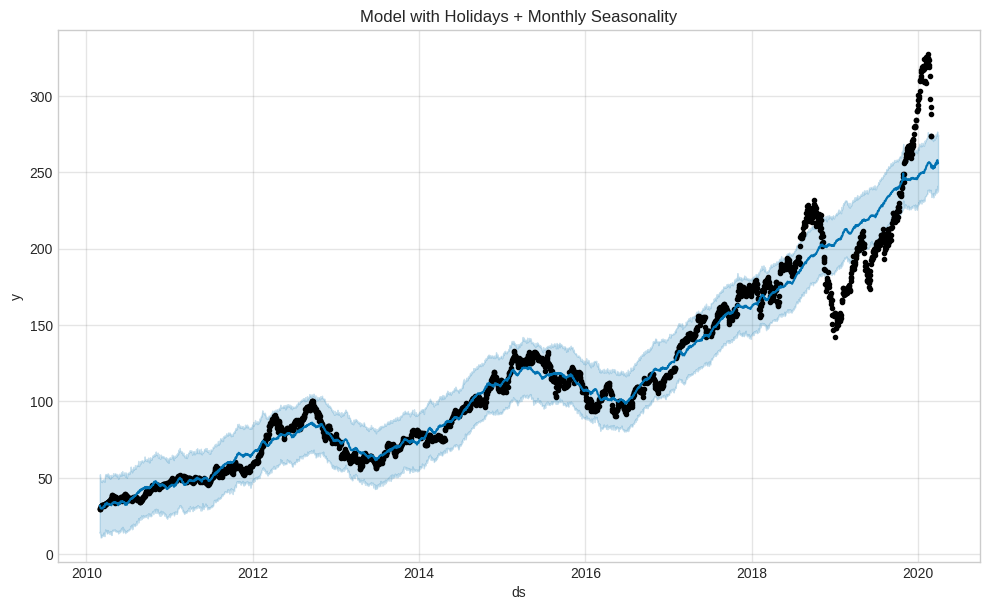

In [ ]:
# @title Default title text
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])

df_prophet = df[['date', 'close/last']].rename(columns={'date': 'ds', 'close/last': 'y'})

# Sample Indian holidays
indian_holidays = pd.DataFrame({
    'holiday': 'indian_festival',
    'ds': pd.to_datetime(['2019-10-27', '2020-11-14', '2021-11-04', '2022-10-24']),
    'lower_window': 0,
    'upper_window': 1,
})

# Model with custom holidays + seasonality
model1 = Prophet(holidays=indian_holidays)
model1.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model1.fit(df_prophet)

future1 = model1.make_future_dataframe(periods=30)
forecast1 = model1.predict(future1)

model1.plot(forecast1)
plt.title("Model with Holidays + Monthly Seasonality")
plt.show()


06:00:34 - cmdstanpy - INFO - Chain [1] start processing
06:00:35 - cmdstanpy - INFO - Chain [1] done processing


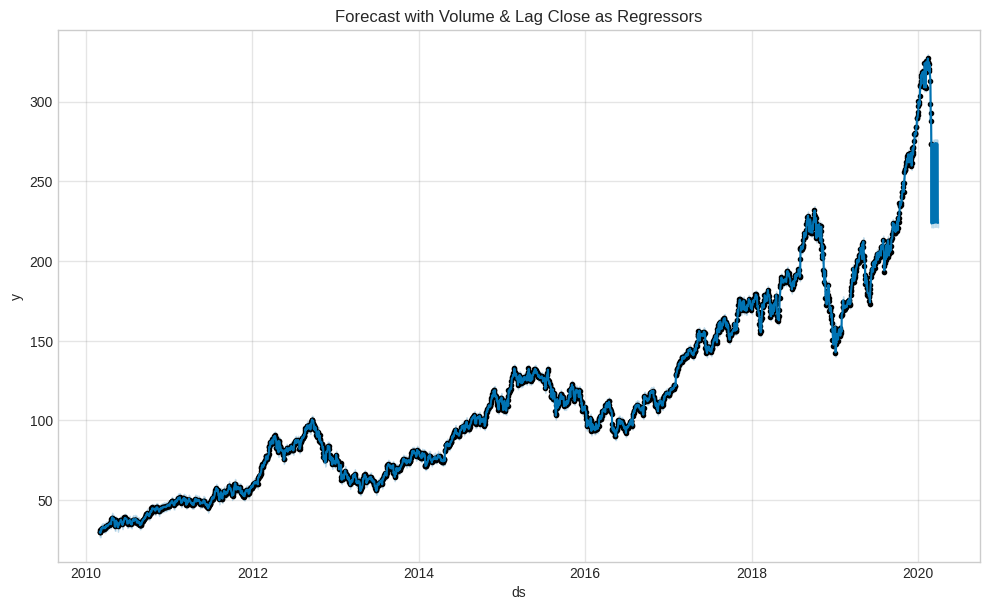

In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])

# Ensure lag_close column is created
df['lag_close'] = df['close/last'].shift(1)
df_model2 = df[['date', 'close/last', 'volume', 'lag_close']].dropna()
df_model2 = df_model2.rename(columns={'date': 'ds', 'close/last': 'y'})

# Initialize and add regressors
model2 = Prophet()
model2.add_regressor('volume')
model2.add_regressor('lag_close')
model2.fit(df_model2)

# Prepare future dataframe with extended forecast
last_date = df_model2['ds'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Create new rows with average values
future_data = pd.DataFrame({
    'ds': future_dates,
    'volume': [df['volume'].mean()] * 30,
    'lag_close': [df_model2['y'].iloc[-1]] * 30
})

# Combine with original dataframe
future2 = pd.concat([df_model2[['ds', 'volume', 'lag_close']], future_data], ignore_index=True)

# Predict
forecast2 = model2.predict(future2)

# Plot
model2.plot(forecast2)
plt.title("Forecast with Volume & Lag Close as Regressors")
plt.show()


06:00:44 - cmdstanpy - INFO - Chain [1] start processing
06:00:44 - cmdstanpy - INFO - Chain [1] done processing


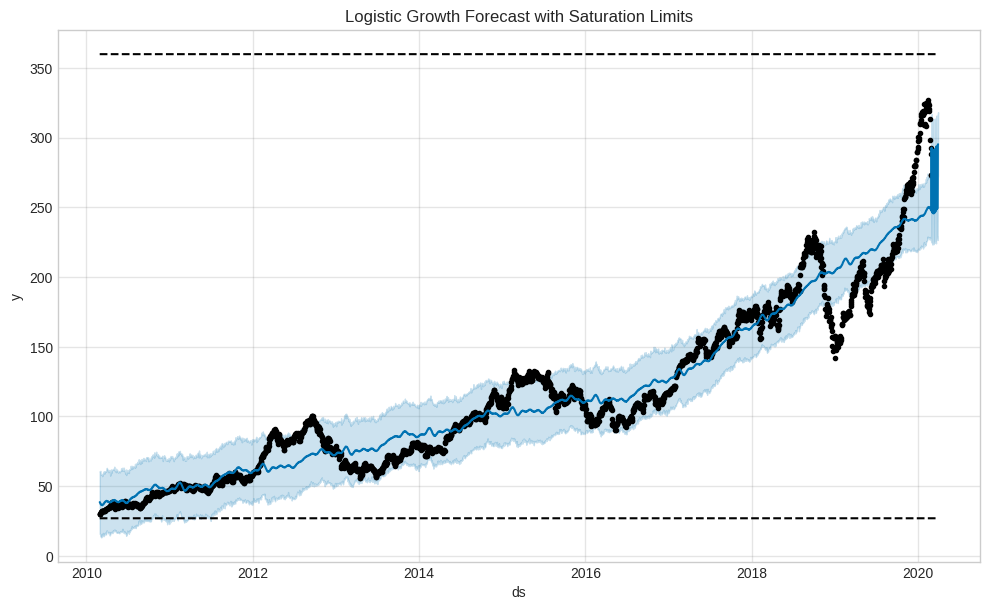

In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])


df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])

# Add logistic growth caps
df['cap'] = df['close/last'].max() * 1.1
df['floor'] = df['close/last'].min() * 0.9

df_logistic = df[['date', 'close/last', 'cap', 'floor']].rename(columns={'date': 'ds', 'close/last': 'y'})

model3 = Prophet(growth='logistic')
model3.fit(df_logistic)

future3 = model3.make_future_dataframe(periods=30)
future3['cap'] = df['cap'].iloc[0]
future3['floor'] = df['floor'].iloc[0]

forecast3 = model3.predict(future3)

model3.plot(forecast3)
plt.title("Logistic Growth Forecast with Saturation Limits")
plt.show()


06:00:56 - cmdstanpy - INFO - Chain [1] start processing
06:00:57 - cmdstanpy - INFO - Chain [1] done processing


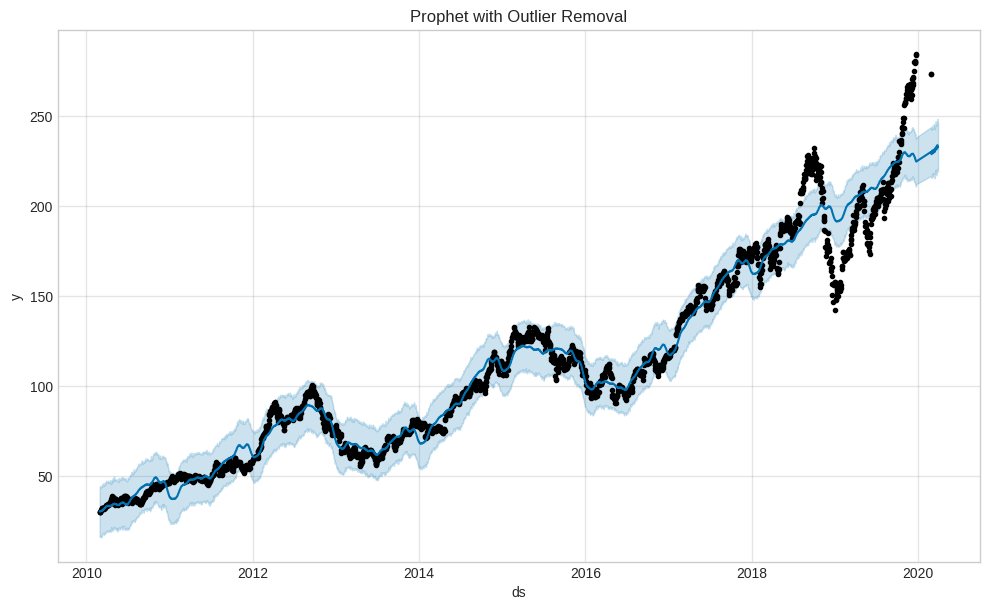

In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])


Q1 = df['close/last'].quantile(0.25)
Q3 = df['close/last'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['close/last'] >= Q1 - 1.5 * IQR) & (df['close/last'] <= Q3 + 1.5 * IQR)]

df_filtered = filtered_df[['date', 'close/last']].rename(columns={'date': 'ds', 'close/last': 'y'})

model5 = Prophet()
model5.fit(df_filtered)

future5 = model5.make_future_dataframe(periods=30)
forecast5 = model5.predict(future5)

model5.plot(forecast5)
plt.title("Prophet with Outlier Removal")
plt.show()


06:01:02 - cmdstanpy - INFO - Chain [1] start processing
06:01:07 - cmdstanpy - INFO - Chain [1] done processing


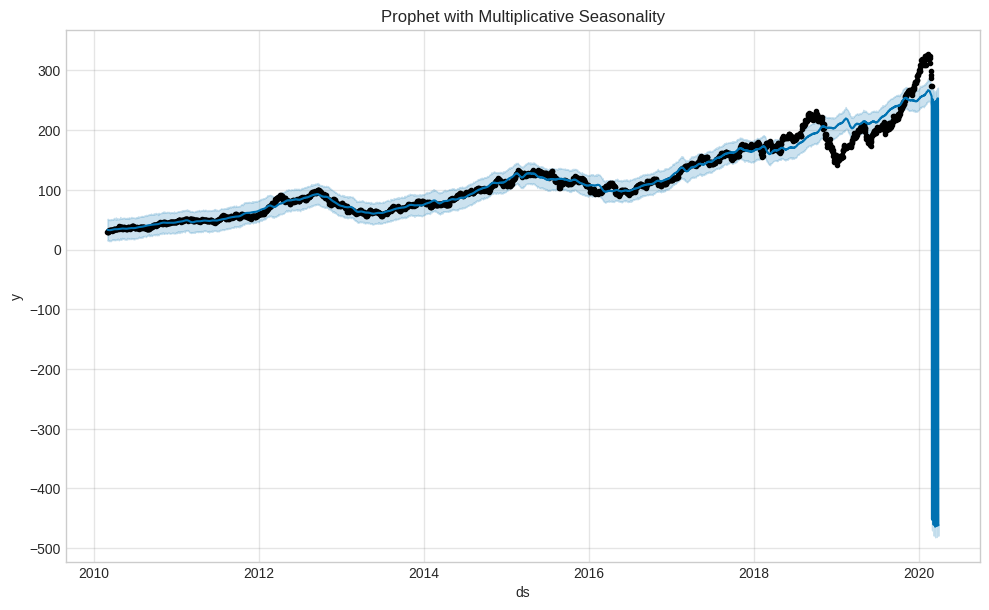

In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])

# Prepare data
df_mult = df[['date', 'close/last']].copy()
df_mult['close/last'] = df_mult['close/last'].replace('[\\$,]', '', regex=True).astype(float)
df_mult['date'] = pd.to_datetime(df_mult['date'])
df_mult = df_mult.rename(columns={'date': 'ds', 'close/last': 'y'})

# Initialize model with multiplicative seasonality
model7 = Prophet(seasonality_mode='multiplicative')
model7.fit(df_mult)

# Forecast
future7 = model7.make_future_dataframe(periods=30)
forecast7 = model7.predict(future7)

# Plot
model7.plot(forecast7)
plt.title("Prophet with Multiplicative Seasonality")
plt.show()


06:01:12 - cmdstanpy - INFO - Chain [1] start processing
06:01:13 - cmdstanpy - INFO - Chain [1] done processing


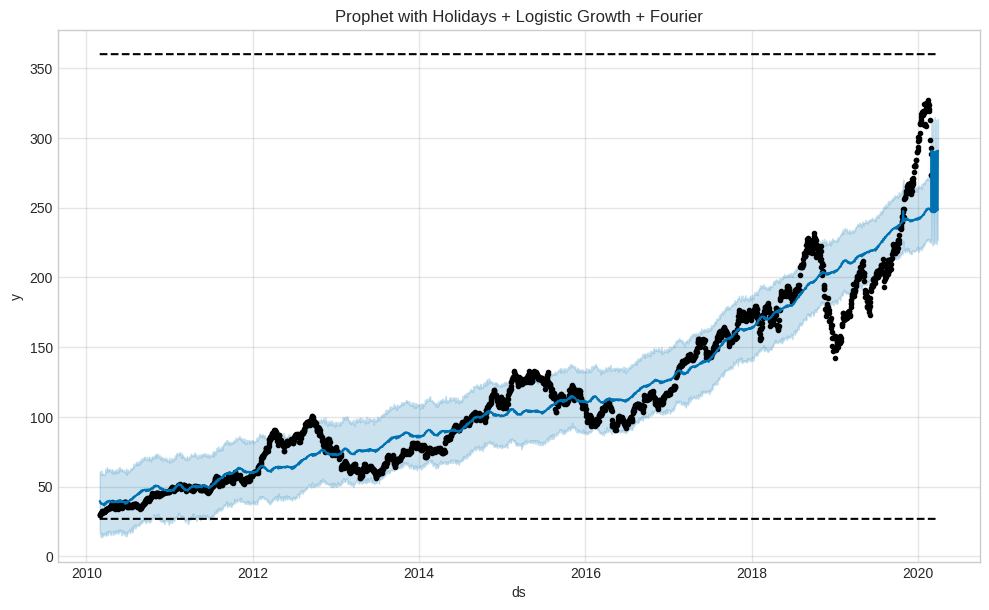

In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])

# Add cap/floor
df['cap'] = df['close/last'].max() * 1.1
df['floor'] = df['close/last'].min() * 0.9

df_advanced = df[['date', 'close/last', 'cap', 'floor']].copy()
df_advanced['close/last'] = df_advanced['close/last'].replace('[\\$,]', '', regex=True).astype(float)
df_advanced['date'] = pd.to_datetime(df_advanced['date'])
df_advanced = df_advanced.rename(columns={'date': 'ds', 'close/last': 'y'})

# Add custom holidays
holidays_df = pd.DataFrame({
    'holiday': 'indian_event',
    'ds': pd.to_datetime(['2019-10-27', '2020-11-14', '2021-11-04', '2022-10-24']),
    'lower_window': 0,
    'upper_window': 1
})

# Create model
model8 = Prophet(growth='logistic', holidays=holidays_df)
model8.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model8.add_seasonality(name='yearly', period=365.25, fourier_order=8)
model8.fit(df_advanced)

# Forecast
future8 = model8.make_future_dataframe(periods=30)
future8['cap'] = df_advanced['cap'].iloc[0]
future8['floor'] = df_advanced['floor'].iloc[0]
forecast8 = model8.predict(future8)

model8.plot(forecast8)
plt.title("Prophet with Holidays + Logistic Growth + Fourier")
plt.show()


06:01:26 - cmdstanpy - INFO - Chain [1] start processing
06:01:26 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


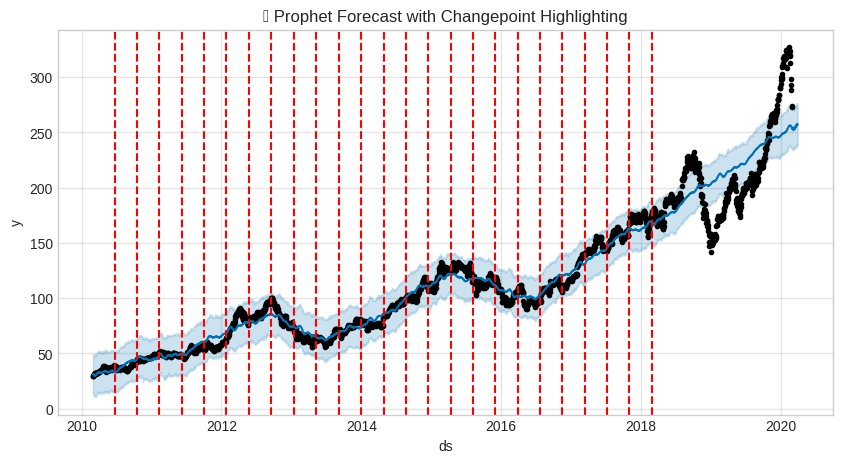


--- PROPHET Modeling Complete ---


In [ ]:
from prophet import Prophet
from prophet.serialize import model_to_json
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("zidio_cleaned (1).csv")
df['close/last'] = df['close/last'].replace('[\$,]', '', regex=True).astype(float)
df['date'] = pd.to_datetime(df['date'])


# Prepare data
df_cp = df[['date', 'close/last']].copy()
df_cp['close/last'] = df_cp['close/last'].replace('[\\$,]', '', regex=True).astype(float)
df_cp['date'] = pd.to_datetime(df_cp['date'])
df_cp = df_cp.rename(columns={'date': 'ds', 'close/last': 'y'})

# Fit model
model_cp = Prophet()
model_cp.fit(df_cp)

# Forecast
future_cp = model_cp.make_future_dataframe(periods=30)
forecast_cp = model_cp.predict(future_cp)

# Plot with changepoints
fig, ax = plt.subplots(figsize=(10, 5))
model_cp.plot(forecast_cp, ax=ax)
for cp in model_cp.changepoints:
    ax.axvline(cp, color='red', linestyle='--')
plt.title("🔺 Prophet Forecast with Changepoint Highlighting")
plt.show()

print("\n--- PROPHET Modeling Complete ---")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use("seaborn-v0_8-whitegrid")

# -------------------------------
# 1. Load & Prepare Data
# -------------------------------
def load_and_prepare_data(file_path): # Use 'file_path' as the parameter name
    df = pd.read_csv(zidio_cleaned.csv) # Use the 'file_path' variable here
    if 'close/last' in df.columns:
        df.rename(columns={'close/last': 'close'}, inplace=True)

    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.sort_index()

    if df['close'].dtype == object:
        df['close'] = df['close'].replace({'\$': '', ',': ''}, regex=True).astype(float)

    return df['close'].dropna()

# -------------------------------
# 2. Fit SARIMA with Auto_arima
# -------------------------------
def fit_sarima(series, seasonal_period):
    print("Fitting SARIMA using auto_arima...")
    model = auto_arima(series,
                       seasonal=True,
                       m=seasonal_period,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,
                       n_jobs=-1) # Added n_jobs=-1 for potential speedup
    print(model.summary())
    return model

# -------------------------------
# 3. Diagnostic Plots
# -------------------------------
def plot_residual_diagnostics(residuals):
    # Ensure residuals are not empty and have enough data for lags
    if residuals is None or len(residuals) < 20: # Arbitrary threshold, adjust if needed
        print("Not enough residual data to plot diagnostics.")
        return

    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title("Model Residuals")
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    # Adjust lags if residuals are short
    lags_to_plot = min(30, len(residuals)//2 - 1)
    if lags_to_plot > 0:
        plot_acf(residuals, ax=ax[0], lags=lags_to_plot)
        plot_pacf(residuals, ax=ax[1], lags=lags_to_plot, method='ywm') # Added method for PACF
        ax[0].set_title("ACF of Residuals")
        ax[1].set_title("PACF of Residuals")
        plt.tight_layout()
        plt.show()
    else:
        print("Residuals too short to plot ACF/PACF.")


# -------------------------------
# 4. Evaluate on Test Data
# -------------------------------
def evaluate_model(model, series, test_fraction=0.2):
    n = len(series)
    if n == 0:
        print("Cannot evaluate model: Input series is empty.")
        return None, None # Or raise an error

    split = int(n * (1 - test_fraction))
    if split == 0 or split == n: # Ensure both train and test sets have data
        print("Warning: Train or test set is empty with the current split. Adjust test_fraction or data size.")
        return None, None

    train, test = series[:split], series[split:]

    # For auto_arima, fitting is done when the model is created.
    # To evaluate on a train/test split, we should ideally fit a new model on `train`
    # or ensure the passed `model` was already fitted only on `train`.
    # Let's assume the passed `model` was fit on the full series, so we refit for evaluation.
    print("Refitting model on training data for evaluation...")
    eval_model = auto_arima(train, # Fit new model on train data
                           seasonal=model.seasonal, # Use parameters from the original model
                           m=model.m if model.seasonal else 1,
                           start_p=model.order[0], max_p=model.order[0], # Fix p
                           d=model.order[1] if model.order[1] is not None else None, # Fix d
                           start_q=model.order[2], max_q=model.order[2], # Fix q
                           start_P=model.seasonal_order[0] if model.seasonal else 0,
                           max_P=model.seasonal_order[0] if model.seasonal else 0,
                           D=model.seasonal_order[1] if model.seasonal and model.seasonal_order[1] is not None else None,
                           start_Q=model.seasonal_order[2] if model.seasonal else 0,
                           max_Q=model.seasonal_order[2] if model.seasonal else 0,
                           stepwise=False, # No need to search if orders are fixed
                           suppress_warnings=True,
                           error_action='ignore',
                           trace=False) # No need for trace during refit

    forecast = eval_model.predict(n_periods=len(test))
    forecast_index = test.index
    forecast_series = pd.Series(forecast, index=forecast_index)

    rmse = np.sqrt(mean_squared_error(test, forecast_series))
    mae = mean_absolute_error(test, forecast_series)

    print(f"Evaluation:\nRMSE = {rmse:.2f}, MAE = {mae:.2f}")

    plt.figure(figsize=(12, 5))
    plt.plot(train.tail(100), label="Train (Last 100 days)") # Use .tail() for plotting recent train data
    plt.plot(test, label="Test")
    plt.plot(forecast_series, label="Forecast", linestyle="--")
    plt.legend()
    plt.title("Train vs Test Forecast")
    plt.show()

    return rmse, mae

# -------------------------------
# 5. Forecast Future Values
# -------------------------------
def forecast_future(model, series, n_days):
    # The model passed here should be the one fitted on the FULL series
    forecast, conf_int = model.predict(n_periods=n_days, return_conf_int=True)
    last_date = series.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq='B')
    forecast_series = pd.Series(forecast, index=forecast_index)

    plt.figure(figsize=(14, 6))
    plt.plot(series.tail(200), label="History (Last 200 days)") # Use .tail()
    plt.plot(forecast_series, label="Forecast", color='red')
    plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
    plt.title("Future Forecast with Confidence Interval")
    plt.legend()
    plt.show()

    return forecast_series

# -------------------------------
# 6. Run Full Pipeline
# -------------------------------
def run_pipeline(file_path, m_seasonality=5, n_future=30): # Changed parameter name here
    ts = load_and_prepare_data(file_path) # Use 'file_path'
    if ts.empty:
        print("Time series is empty after loading. Exiting pipeline.")
        return
    print(f"Loaded time series with {len(ts)} points.")

    sarima_model_full = fit_sarima(ts, seasonal_period=m_seasonality) # Model fitted on full data
    if sarima_model_full.resid() is not None and len(sarima_model_full.resid()) > 0:
        plot_residual_diagnostics(sarima_model_full.resid())
    else:
        print("No residuals available from the full model to plot diagnostics.")

    # Pass the sarima_model_full to evaluate_model, it will be refitted on train data inside
    evaluate_model(sarima_model_full, ts) # sarima_model_full provides initial orders for refitting

    # Use sarima_model_full (fitted on all data) for future forecasting
    future_forecasts = forecast_future(sarima_model_full, ts, n_days=n_future)
    if future_forecasts is not None:
        print("\nForecasted Values:")
        print(future_forecasts)

# -------------------------------
# Run the script
# -------------------------------

file_to_process = "zidio_cleaned.csv" # Define the file path as a string
run_pipeline(file_to_process, m_seasonality=5, n_future=30)

NameError: name 'zidio_cleaned' is not defined

In [ ]:
!pip install pmdarima


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4
!pip install pmdarima


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - loss: 0.0097 - val_loss: 3.1223e-04
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 6.0570e-04 - val_loss: 3.6431e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 4.4279e-04 - val_loss: 3.0805e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.2844e-04 - val_loss: 2.8020e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.2596e-04 - val_loss: 2.7249e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 2.4208e-04 - val_loss: 2.6582e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.4965e-04 - val_loss: 3.0751e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.6412e-04 - val_loss: 2.6995e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.5028e-04 - val_loss: 2.4690e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 2.1576e-04 - val_loss: 3.1625e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


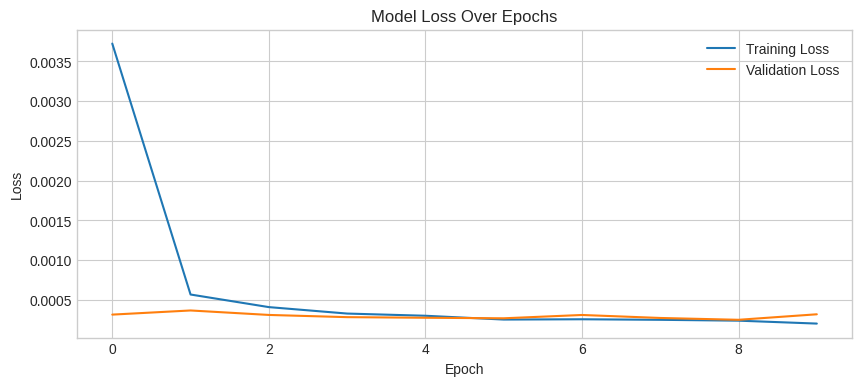

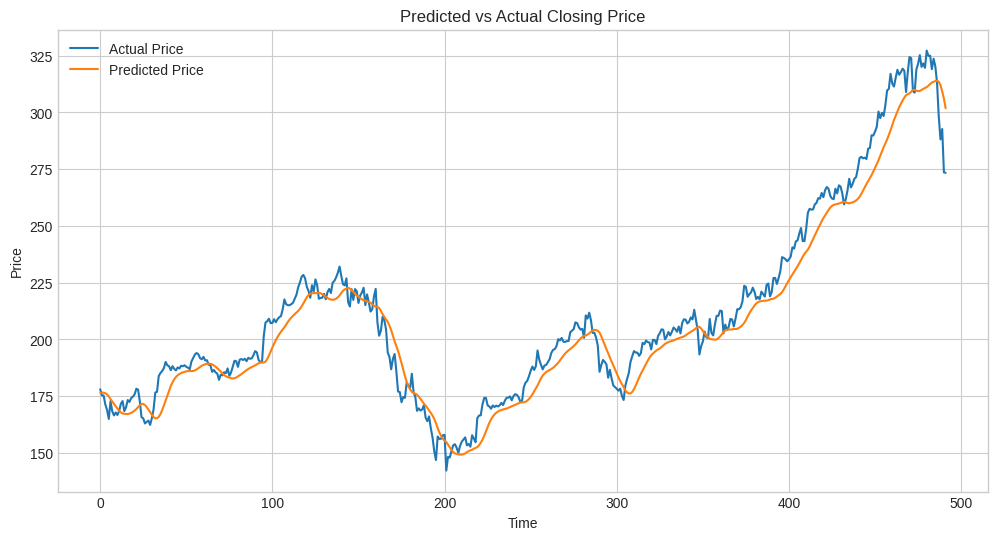

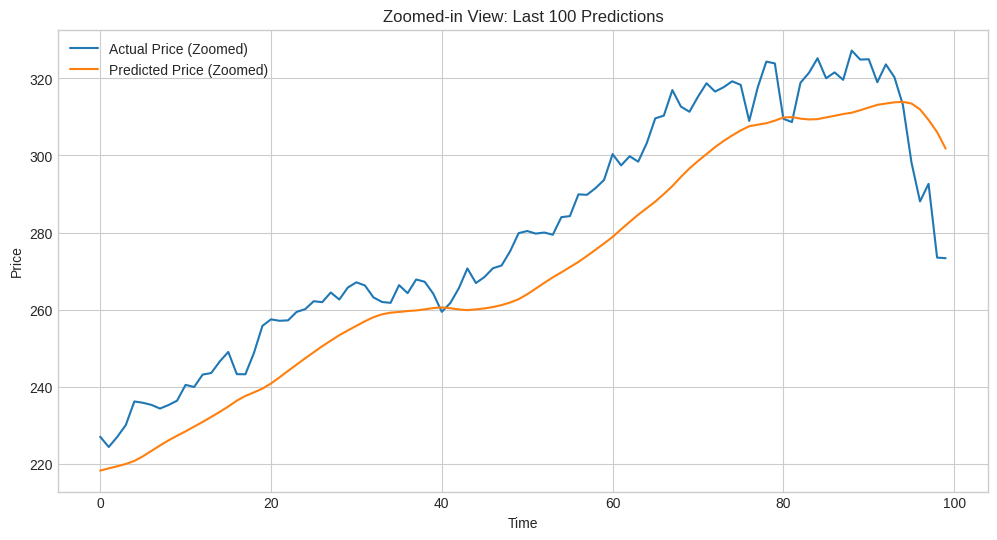

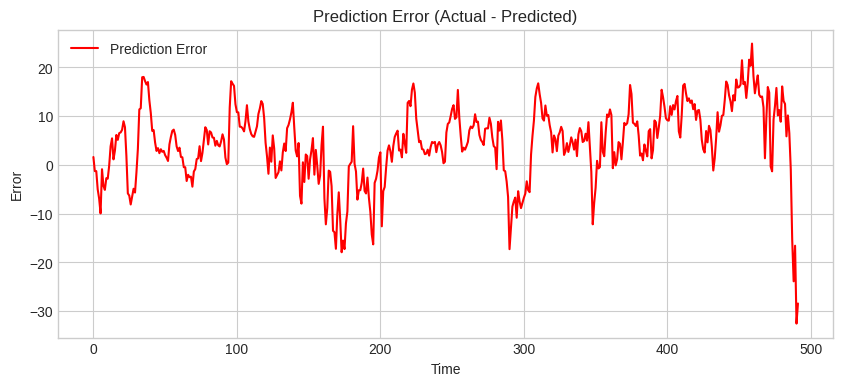

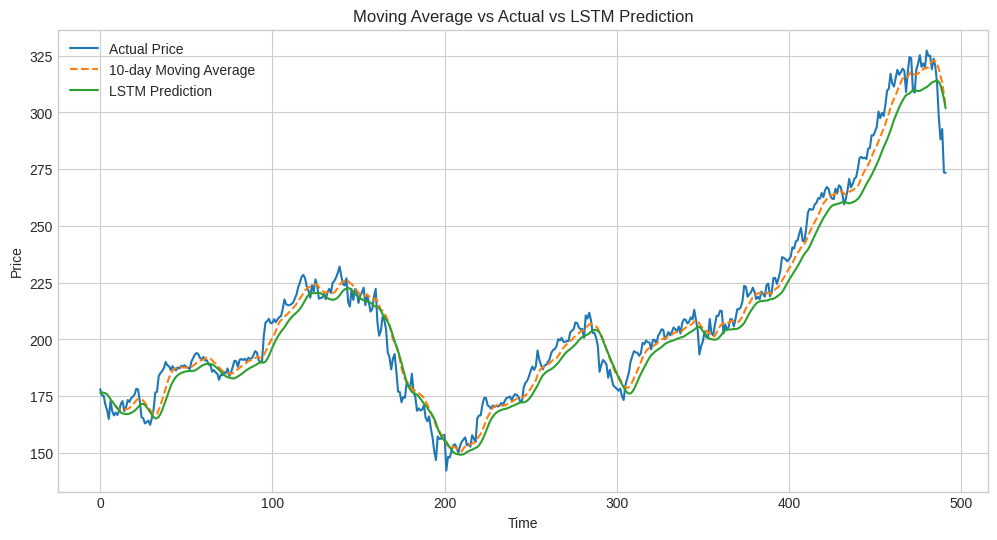

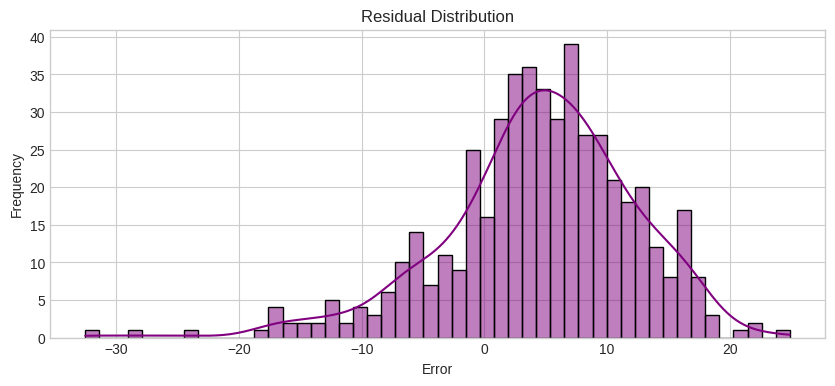

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("zidio_cleaned (1).csv")

# Clean and preprocess
for col in ['close/last', 'open', 'high', 'low']:
    df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Use only closing prices
data = df[['close/last']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
seq_len = 60
X, y = [], []

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i - seq_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict and inverse scale
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 1. Plot training & validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot full predicted vs actual
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Predicted vs Actual Closing Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. Zoomed-in view (last 100 days)
plt.figure(figsize=(12, 6))
plt.plot(actual[-100:], label='Actual Price (Zoomed)')
plt.plot(predictions[-100:], label='Predicted Price (Zoomed)')
plt.title('Zoomed-in View: Last 100 Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot prediction error
error = actual.flatten() - predictions.flatten()
plt.figure(figsize=(10, 4))
plt.plot(error, label='Prediction Error', color='red')
plt.title('Prediction Error (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# 5. Compute 10-day moving average
moving_avg = pd.Series(actual.flatten()).rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(moving_avg, label='10-day Moving Average', linestyle='--')
plt.plot(predictions, label='LSTM Prediction')
plt.title('Moving Average vs Actual vs LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# 6, Calculate residuals (errors)
residuals = actual.flatten() - predictions.flatten()

plt.figure(figsize=(10, 4))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()






Total data points: 2518
Training data points: 2014
Test data points: 504

--- Evaluating: Prophet - Holidays + Monthly Seasonality ---


15:02:17 - cmdstanpy - INFO - Chain [1] start processing
15:02:19 - cmdstanpy - INFO - Chain [1] done processing


Metrics for Prophet - Holidays+Monthly: RMSE = 31.8878, MAE = 25.9840

--- Evaluating: Prophet - Volume & Lag Close Regressors ---


15:02:20 - cmdstanpy - INFO - Chain [1] start processing
15:02:21 - cmdstanpy - INFO - Chain [1] done processing
15:02:21 - cmdstanpy - INFO - Chain [1] start processing


Metrics for Prophet - Regressors (Volume, Lag): RMSE = 50.6288, MAE = 35.1410

--- Evaluating: Prophet - Logistic Growth ---


15:02:23 - cmdstanpy - INFO - Chain [1] done processing
15:02:28 - cmdstanpy - INFO - Chain [1] start processing


Metrics for Prophet - Logistic Growth: RMSE = 45.5576, MAE = 31.3570

--- Evaluating: Prophet - Outlier Removal ---


15:02:29 - cmdstanpy - INFO - Chain [1] done processing


Metrics for Prophet - Outlier Removal (Train): RMSE = 31.8983, MAE = 26.0172

--- Evaluating: SARIMA ---


/usr/local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2014
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3581.213
Date:                Mon, 16 Jun 2025   AIC                           7174.426
Time:                        15:03:18   BIC                           7208.070
Sample:                             0   HQIC                          7186.776
                               - 2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1902      0.083      2.288      0.022       0.027       0.353
ar.L1         -0.6150      0.019    -33.163      0.000      -0.651      -0.579
ar.L2         -0.9671      0.019    -52.123      0.0

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...


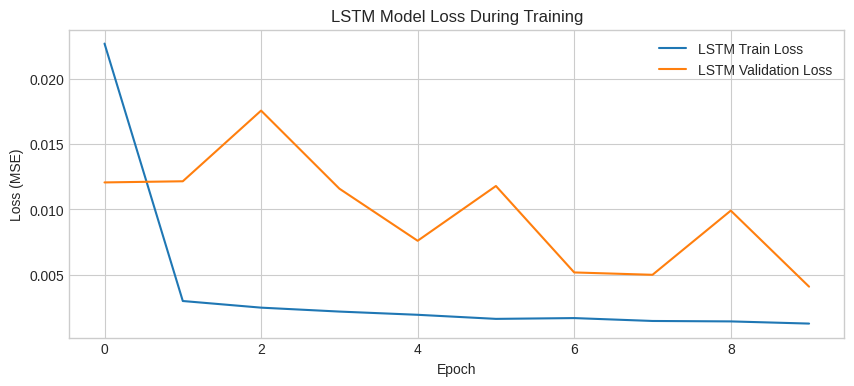

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Metrics for LSTM (Lookback 60): RMSE = 9.5623, MAE = 7.4737


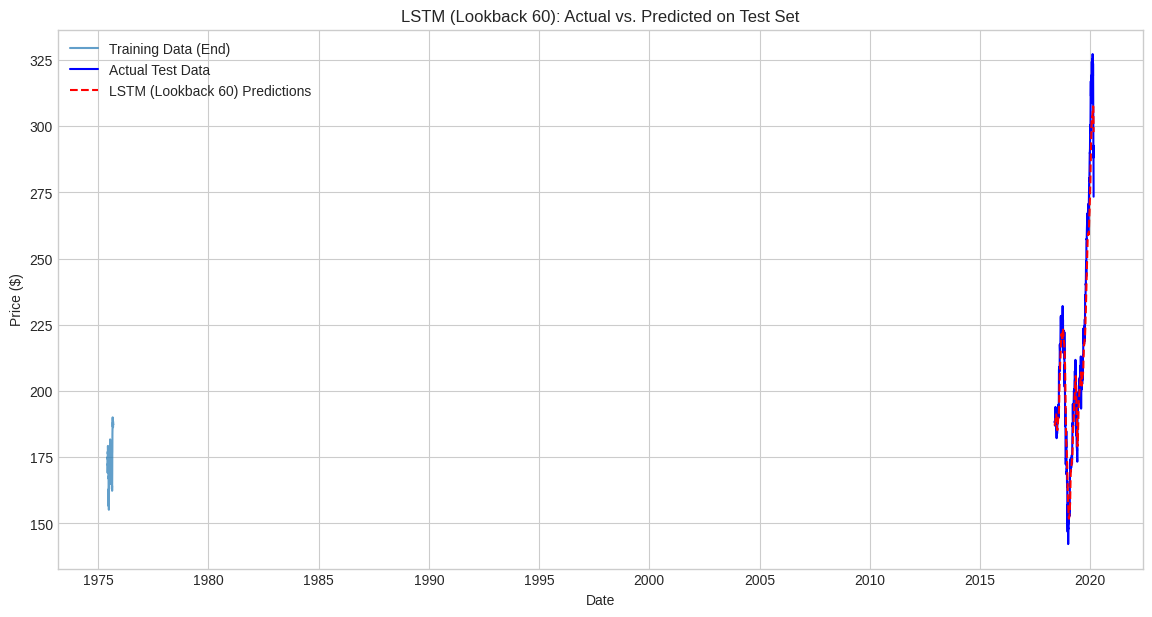



--- Model Comparison Results ---
                                Model       RMSE        MAE
5                  LSTM (Lookback 60)   9.562285   7.473709
0          Prophet - Holidays+Monthly  31.887798  25.984019
3   Prophet - Outlier Removal (Train)  31.898311  26.017159
4         SARIMA(2, 1, 2)(0, 0, 0, 5)  37.435042  25.591056
2           Prophet - Logistic Growth  45.557574  31.356960
1  Prophet - Regressors (Volume, Lag)  50.628767  35.140973

Plotting test predictions for the best performing model: LSTM (Lookback 60)

--- Model Evaluation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics # For Prophet tuning later

# ARIMA/SARIMA
from pmdarima import auto_arima

# LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plot style and random seeds for reproducibility
plt.style.use('seaborn-v0_8-whitegrid')
tf.random.set_seed(42)
np.random.seed(42)

# --- 0. Configuration & Helper Functions ---
FILE_PATH = 'zidio_cleaned.csv' # Make sure this file is uploaded to Colab
TEST_FRACTION = 0.2 # 20% of data for testing
LSTM_LOOK_BACK = 60
LSTM_EPOCHS = 10 # Keep low for quick evaluation, increase for final model
LSTM_BATCH_SIZE = 32

def calculate_metrics(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Metrics for {model_name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae}

def plot_test_predictions(train_actual, test_actual, test_predictions, model_name="Model"):
    plt.figure(figsize=(14, 7))
    plt.plot(train_actual.index, train_actual.values, label='Training Data (End)', alpha=0.7)
    plt.plot(test_actual.index, test_actual.values, label='Actual Test Data', color='blue')
    plt.plot(test_actual.index, test_predictions, label=f'{model_name} Predictions', color='red', linestyle='--')
    plt.title(f'{model_name}: Actual vs. Predicted on Test Set')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

# --- 1. Load and Prepare Full Dataset ---
df_full = pd.read_csv('zidio_cleaned.csv')
if 'close/last' in df_full.columns:
    df_full.rename(columns={'close/last': 'close'}, inplace=True)
if df_full['close'].dtype == 'object':
    df_full['close'] = df_full['close'].replace('[\$,]', '', regex=True).astype(float)
df_full['date'] = pd.to_datetime(df_full['date'])
df_full = df_full.sort_values('date').reset_index(drop=True) # Ensure sorted and has simple index initially

# --- 2. Create Train/Test Splits ---
n_total = len(df_full)
n_train = int(n_total * (1 - TEST_FRACTION))
n_test = n_total - n_train

# For Prophet (needs 'ds' and 'y' columns)
df_prophet_format = df_full[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
train_prophet_df = df_prophet_format.iloc[:n_train]
test_prophet_df_actual = df_prophet_format.iloc[n_train:] # Contains actual 'ds' and 'y' for test period

# For ARIMA/SARIMA (needs a pandas Series with DatetimeIndex)
series_full_for_arima = df_full.set_index('date')['close'].dropna()
train_arima_series = series_full_for_arima.iloc[:n_train]
test_arima_series_actual = series_full_for_arima.iloc[n_train:]

# For LSTM (needs numpy array, scaling, and sequence creation)
data_lstm_full = df_full[['close']].values
train_lstm_data_unscaled = data_lstm_full[:n_train]
test_lstm_data_unscaled = data_lstm_full[n_train:]

print(f"Total data points: {n_total}")
print(f"Training data points: {n_train}")
print(f"Test data points: {n_test}")

# --- 3. Model Training, Prediction, and Evaluation ---
all_results = []

# === Model 1: Prophet - Holidays + Monthly Seasonality ===
print("\n--- Evaluating: Prophet - Holidays + Monthly Seasonality ---")
try:
    indian_holidays = pd.DataFrame({
        'holiday': 'indian_festival',
        'ds': pd.to_datetime(['2019-10-27', '2020-11-14', '2021-11-04', '2022-10-24']),
        'lower_window': 0, 'upper_window': 1,
    })
    m1 = Prophet(holidays=indian_holidays)
    m1.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    m1.fit(train_prophet_df)
    future1 = m1.make_future_dataframe(periods=n_test, freq='D') # Use 'D' for daily if your data is daily
    forecast1 = m1.predict(future1)
    predictions1 = forecast1['yhat'][-n_test:].values
    all_results.append(calculate_metrics(test_prophet_df_actual['y'].values, predictions1, "Prophet - Holidays+Monthly"))
    # plot_test_predictions(train_prophet_df['y'], test_prophet_df_actual['y'], predictions1, "Prophet - Holidays+Monthly")
except Exception as e:
    print(f"Error evaluating Prophet Model 1: {e}")

# === Model 2: Prophet - Volume & Lag Close Regressors ===
print("\n--- Evaluating: Prophet - Volume & Lag Close Regressors ---")
try:
    df_prophet_reg = df_full.copy()
    df_prophet_reg['lag_close'] = df_prophet_reg['close'].shift(1)
    df_prophet_reg = df_prophet_reg[['date', 'close', 'volume', 'lag_close']].dropna()
    df_prophet_reg = df_prophet_reg.rename(columns={'date': 'ds', 'close': 'y'})

    train_prophet_reg_df = df_prophet_reg.iloc[:n_train -1] # Adjust for shift if first row of original train is now NaN
    test_prophet_reg_df_actual = df_prophet_reg.iloc[n_train-1 : n_train-1+n_test]


    m2 = Prophet()
    m2.add_regressor('volume')
    m2.add_regressor('lag_close')
    m2.fit(train_prophet_reg_df)

    # For test period, we need future values of regressors
    # Simplistic approach: use mean for volume, last known for lag_close from train
    future_reg_df = pd.DataFrame({'ds': test_prophet_reg_df_actual['ds']})
    future_reg_df['volume'] = train_prophet_reg_df['volume'].mean() # Or a more sophisticated forecast for volume
    future_reg_df['lag_close'] = train_prophet_reg_df['y'].iloc[-1]   # Last y from training as lag_close

    forecast2 = m2.predict(future_reg_df)
    predictions2 = forecast2['yhat'].values # No need to slice if future_reg_df only has test dates
    all_results.append(calculate_metrics(test_prophet_reg_df_actual['y'].values, predictions2, "Prophet - Regressors (Volume, Lag)"))
except Exception as e:
    print(f"Error evaluating Prophet Model 2: {e}")


# === Model 3: Prophet - Logistic Growth ===
print("\n--- Evaluating: Prophet - Logistic Growth ---")
try:
    df_logistic_train = train_prophet_df.copy()
    df_logistic_train['cap'] = train_prophet_df['y'].max() * 1.1 # Cap based on training data
    df_logistic_train['floor'] = train_prophet_df['y'].min() * 0.9 # Floor based on training data

    m3 = Prophet(growth='logistic')
    m3.fit(df_logistic_train)

    future3 = m3.make_future_dataframe(periods=n_test, freq='D')
    future3['cap'] = df_logistic_train['cap'].iloc[0] # Use same cap/floor for future
    future3['floor'] = df_logistic_train['floor'].iloc[0]
    forecast3 = m3.predict(future3)
    predictions3 = forecast3['yhat'][-n_test:].values
    all_results.append(calculate_metrics(test_prophet_df_actual['y'].values, predictions3, "Prophet - Logistic Growth"))
except Exception as e:
    print(f"Error evaluating Prophet Model 3: {e}")

# === Add other Prophet Models (Model 5, 7, 8, cp) similarly ===
# Remember to fit only on training data and adjust future dataframes for regressors/cap/floor as needed.

print("\n--- Evaluating: Prophet - Outlier Removal ---")
try:
    # Outlier removal should be done ONLY on training data to avoid data leakage
    q1_train = train_prophet_df['y'].quantile(0.25)
    q3_train = train_prophet_df['y'].quantile(0.75)
    iqr_train = q3_train - q1_train
    train_prophet_filtered = train_prophet_df[
        (train_prophet_df['y'] >= q1_train - 1.5 * iqr_train) &
        (train_prophet_df['y'] <= q3_train + 1.5 * iqr_train)
    ]
    m5 = Prophet()
    m5.fit(train_prophet_filtered)
    future5 = m5.make_future_dataframe(periods=n_test, freq='D')
    forecast5 = m5.predict(future5)
    predictions5 = forecast5['yhat'][-n_test:].values
    all_results.append(calculate_metrics(test_prophet_df_actual['y'].values, predictions5, "Prophet - Outlier Removal (Train)"))
except Exception as e:
    print(f"Error evaluating Prophet Model 5: {e}")


# === Model SARIMA ===
print("\n--- Evaluating: SARIMA ---")
try:
    # Using m=5 as an example, adjust if needed
    sarima_model = auto_arima(train_arima_series,
                              seasonal=True, m=5,
                              stepwise=True, suppress_warnings=True,
                              trace=False, error_action='ignore',
                              n_jobs=-1)
    print(sarima_model.summary())
    predictions_sarima = sarima_model.predict(n_periods=n_test)
    all_results.append(calculate_metrics(test_arima_series_actual.values, predictions_sarima, f"SARIMA{sarima_model.order}{sarima_model.seasonal_order}"))
except Exception as e:
    print(f"Error evaluating SARIMA: {e}")


# === Model LSTM ===
print("\n--- Evaluating: LSTM ---")
try:
    # 1. Scale LSTM data (fit on train, transform train and test)
    scaler_lstm = MinMaxScaler(feature_range=(0, 1))
    scaled_train_lstm = scaler_lstm.fit_transform(train_lstm_data_unscaled)
    scaled_test_lstm = scaler_lstm.transform(test_lstm_data_unscaled)

    # 2. Create sequences for LSTM
    def create_lstm_sequences(dataset, look_back=LSTM_LOOK_BACK):
        X, Y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    # This is where X_train_lstm and y_train_lstm are defined
    X_train_lstm, y_train_lstm = create_lstm_sequences(scaled_train_lstm)
    X_test_lstm, y_test_lstm_scaled = create_lstm_sequences(scaled_test_lstm)

    # Reshape for LSTM: [samples, time_steps, features]
    X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

    # 3. Build and Train LSTM Model
    lstm_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)), Dropout(0.2),
        LSTM(50, return_sequences=False), Dropout(0.2),
        Dense(25), Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    print("Training LSTM model...")

    # The model.fit call uses the X_train_lstm and y_train_lstm defined above
    history = lstm_model.fit(
    X_train_lstm, y_train_lstm,    # These variables must be defined before this line
    epochs=LSTM_EPOCHS,
    batch_size=LSTM_BATCH_SIZE,
    validation_data=(X_test_lstm, y_test_lstm_scaled),
    verbose=0
    )

    # Plot LSTM training loss
    plt.figure(figsize=(10,4))
    plt.plot(history.history['loss'], label='LSTM Train Loss')
    plt.plot(history.history['val_loss'], label='LSTM Validation Loss')
    plt.title('LSTM Model Loss During Training')
    plt.xlabel('Epoch'); plt.ylabel('Loss (MSE)'); plt.legend(); plt.show()

    # 4. Predict and Inverse Scale
    predictions_lstm_scaled = lstm_model.predict(X_test_lstm)
    predictions_lstm_original = scaler_lstm.inverse_transform(predictions_lstm_scaled)

    actual_lstm_test_original = df_full['close'].iloc[n_train + LSTM_LOOK_BACK : n_train + LSTM_LOOK_BACK + len(predictions_lstm_original)].values

    min_len = min(len(actual_lstm_test_original), len(predictions_lstm_original))
    actual_lstm_test_original = actual_lstm_test_original[:min_len]
    predictions_lstm_original = predictions_lstm_original[:min_len]

    if len(actual_lstm_test_original) > 0:
         all_results.append(calculate_metrics(actual_lstm_test_original, predictions_lstm_original, f"LSTM (Lookback {LSTM_LOOK_BACK})"))
         train_actual_for_lstm_plot = df_full['close'].iloc[:n_train + LSTM_LOOK_BACK]
         test_actual_for_lstm_plot = pd.Series(actual_lstm_test_original, index=df_full['date'].iloc[n_train + LSTM_LOOK_BACK : n_train + LSTM_LOOK_BACK + len(actual_lstm_test_original)])
         plot_test_predictions(train_actual_for_lstm_plot.tail(100),
                              test_actual_for_lstm_plot,
                              predictions_lstm_original,
                              f"LSTM (Lookback {LSTM_LOOK_BACK})")
    else:
        print("Not enough test data to evaluate LSTM after sequence creation.")

except Exception as e:
    print(f"Error evaluating LSTM: {e}")
    import traceback
    print(traceback.format_exc())

# --- 4. Display Comparative Results ---
if all_results:
    results_df = pd.DataFrame(all_results)
    print("\n\n--- Model Comparison Results ---")
    print(results_df.sort_values(by='RMSE'))

    # Plot for the best model (example: find model with min RMSE)
    if not results_df.empty:
        best_model_name = results_df.loc[results_df['RMSE'].idxmin()]['Model']
        print(f"\nPlotting test predictions for the best performing model: {best_model_name}")
        # You'll need to re-run prediction for the best model to plot it here,
        # or store predictions along with metrics if you want to avoid re-predicting.
        # This part is left as an exercise to integrate based on how you store predictions.
        # For instance, if 'Prophet - Holidays+Monthly' was best:
        # plot_test_predictions(train_prophet_df['y'], test_prophet_df_actual['y'], predictions1, best_model_name)
else:
    print("\nNo models were successfully evaluated.")

print("\n--- Model Evaluation Complete ---")

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools # For Prophet parameter grid

# Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# ARIMA/SARIMA
from pmdarima import auto_arima

# LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow import keras # For Keras Tuner
from kerastuner.tuners import RandomSearch, Hyperband # Keras Tuner (install if needed: pip install keras-tuner)


# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plot style and random seeds for reproducibility
plt.style.use('seaborn-v0_8-whitegrid')
tf.random.set_seed(42)
np.random.seed(42)

# --- 0. Configuration & Helper Functions ---
FILE_PATH = "zidio_cleaned.csv" # Make sure this file is uploaded
TEST_FRACTION = 0.2
VALIDATION_FRACTION_FROM_TRAIN = 0.2 # e.g., use 20% of training data for validation during tuning

LSTM_LOOK_BACK = 60
LSTM_EPOCHS_TUNING = 5 # Fewer epochs for tuning trials
LSTM_EPOCHS_FINAL = 15  # More epochs for final model after tuning
LSTM_BATCH_SIZE = 32
KERAS_TUNER_MAX_TRIALS = 5 # Number of hyperparameter combinations to try for LSTM
KERAS_TUNER_EXECUTIONS_PER_TRIAL = 1 # Train each model once per trial for speed

def calculate_metrics(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Metrics for {model_name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae}

# (Keep your plot_test_predictions function as is)
def plot_test_predictions(train_actual, test_actual, test_predictions, model_name="Model"):
    plt.figure(figsize=(14, 7))
    # Ensure train_actual and test_actual have a DatetimeIndex if plotting dates
    if isinstance(train_actual.index, pd.DatetimeIndex):
        plt.plot(train_actual.index, train_actual.values, label='Training Data (End)', alpha=0.7)
    else: # If simple range index from LSTM data preparation
        plt.plot(range(len(train_actual)-100, len(train_actual)), train_actual.values[-100:], label='Training Data (End)', alpha=0.7)

    if isinstance(test_actual.index, pd.DatetimeIndex):
        plt.plot(test_actual.index, test_actual.values, label='Actual Test Data', color='blue')
        plt.plot(test_actual.index, test_predictions, label=f'{model_name} Predictions', color='red', linestyle='--')
    else: # If simple range index
        plt.plot(range(len(test_actual)), test_actual.values, label='Actual Test Data', color='blue')
        plt.plot(range(len(test_actual)), test_predictions, label=f'{model_name} Predictions', color='red', linestyle='--')

    plt.title(f'{model_name}: Actual vs. Predicted on Test Set')
    plt.xlabel('Time/Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()


# --- 1. Load and Prepare Full Dataset ---
df_full = pd.read_csv(FILE_PATH) # Ensure FILE_PATH is correct
if 'close/last' in df_full.columns:
    df_full.rename(columns={'close/last': 'close'}, inplace=True)
if df_full['close'].dtype == 'object':
    df_full['close'] = df_full['close'].replace('[\$,]', '', regex=True).astype(float)
df_full['date'] = pd.to_datetime(df_full['date'])
df_full = df_full.sort_values('date').reset_index(drop=True)

# --- 2. Create Overall Train/Test Splits (for final evaluation) ---
n_total = len(df_full)
n_overall_train = int(n_total * (1 - TEST_FRACTION))
n_overall_test = n_total - n_overall_train

df_overall_train = df_full.iloc[:n_overall_train]
df_overall_test = df_full.iloc[n_overall_train:] # This is the final hold-out test set

print(f"Total data points: {n_total}")
print(f"Overall Training data points (for model fitting after tuning): {n_overall_train}")
print(f"Overall Test data points (for final evaluation): {n_overall_test}")

# --- 3. Data Preparation for Tuning (Train/Validation from Overall Train) ---
n_tune_train_end_idx = int(n_overall_train * (1 - VALIDATION_FRACTION_FROM_TRAIN))

# For Prophet tuning
df_prophet_tune_train = df_overall_train.iloc[:n_tune_train_end_idx][['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
df_prophet_tune_val = df_overall_train.iloc[n_tune_train_end_idx:][['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# For ARIMA/SARIMA tuning (if manual search, auto_arima does its own)
series_arima_tune_train = df_overall_train.iloc[:n_tune_train_end_idx].set_index('date')['close'].dropna()
series_arima_tune_val = df_overall_train.iloc[n_tune_train_end_idx:].set_index('date')['close'].dropna()

# For LSTM tuning
data_lstm_tune_train_unscaled = df_overall_train.iloc[:n_tune_train_end_idx][['close']].values
data_lstm_tune_val_unscaled = df_overall_train.iloc[n_tune_train_end_idx:][['close']].values

print(f"Data for Tuning: Training points: {len(df_prophet_tune_train)}, Validation points: {len(df_prophet_tune_val)}")


all_final_results = [] # To store results of tuned models on the overall test set


Total data points: 2518
Overall Training data points (for model fitting after tuning): 2014
Overall Test data points (for final evaluation): 504
Data for Tuning: Training points: 1611, Validation points: 403



--- Tuning and Evaluating: Prophet Models ---
Tuning Prophet (Example with changepoint and seasonality prior)...


15:31:24 - cmdstanpy - INFO - Chain [1] start processing
15:31:25 - cmdstanpy - INFO - Chain [1] done processing
15:31:26 - cmdstanpy - INFO - Chain [1] start processing
15:31:26 - cmdstanpy - INFO - Chain [1] done processing
15:31:27 - cmdstanpy - INFO - Chain [1] start processing
15:31:27 - cmdstanpy - INFO - Chain [1] done processing
15:31:27 - cmdstanpy - INFO - Chain [1] start processing
15:31:28 - cmdstanpy - INFO - Chain [1] done processing
15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:30 - cmdstanpy - INFO - Chain [1] done processing
15:31:31 - cmdstanpy - INFO - Chain [1] start processing
15:31:33 - cmdstanpy - INFO - Chain [1] done processing
15:31:35 - cmdstanpy - INFO - Chain [1] start processing
15:31:37 - cmdstanpy - INFO - Chain [1] done processing
15:31:38 - cmdstanpy - INFO - Chain [1] start processing
15:31:39 - cmdstanpy - INFO - Chain [1] done processing
15:31:40 - cmdstanpy - INFO - Chain [1] start processing
15:31:41 - cmdstanpy - INFO - Chain [1]

Best Prophet Config (Example): {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0} with Validation RMSE: 62.924846148402786
Evaluating best Prophet config on the overall test set...


15:31:42 - cmdstanpy - INFO - Chain [1] done processing


Metrics for Tuned Prophet {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}: RMSE = 31.7772, MAE = 25.3103


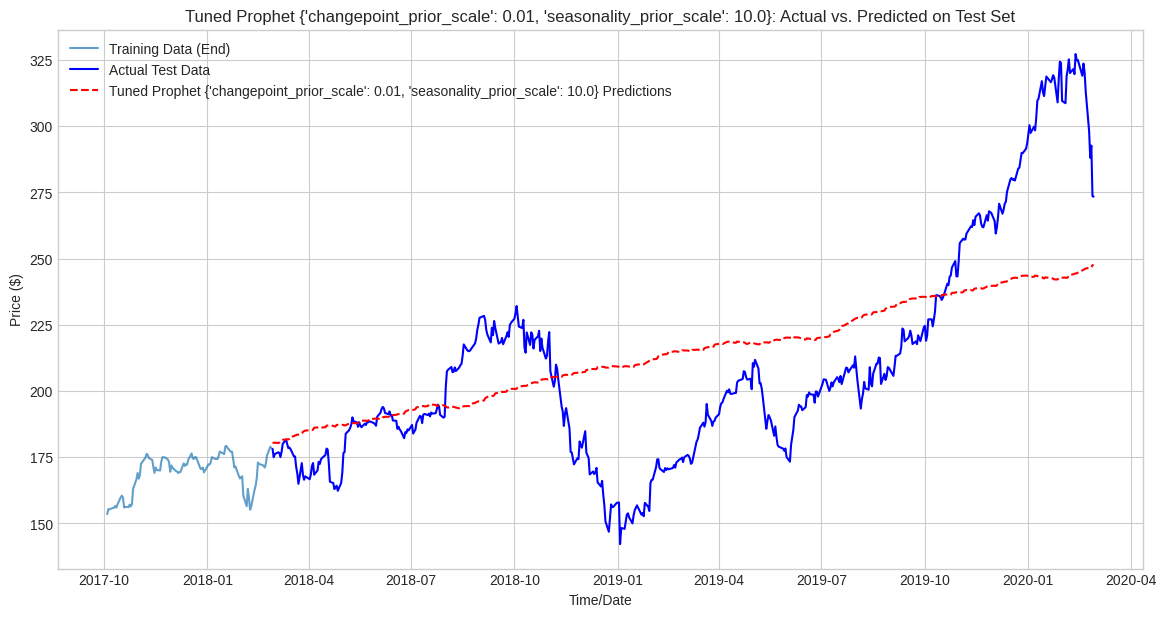

In [ ]:
# --- 4. Model Tuning, Training, Prediction, and Final Evaluation ---

# === Prophet Model Tuning and Evaluation ===
print("\n--- Tuning and Evaluating: Prophet Models ---")
best_prophet_params = {} # Store best params for different Prophet variations if you tune them separately

# Example: Tuning for a generic Prophet model (adapt for your specific variants)
# For simplicity, we'll tune a base Prophet and then apply similar logic to others
prophet_param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    # 'holidays_prior_scale': [1.0, 5.0, 10.0] # If using holidays
}
prophet_param_combinations = [dict(zip(prophet_param_grid.keys(), v)) for v in itertools.product(*prophet_param_grid.values())]
best_prophet_rmse = float('inf')
best_prophet_config = None

print("Tuning Prophet (Example with changepoint and seasonality prior)...")
for params in prophet_param_combinations:
    try:
        m_tune = Prophet(**params)
        # Add other components like holidays, custom seasonalities based on which Prophet variant you're tuning
        # Example: if tuning Model 1 from your previous code
        # m_tune.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        # m_tune.add_holidays(indian_holidays_df) # Assuming indian_holidays_df is defined

        m_tune.fit(df_prophet_tune_train)
        future_tune_val = m_tune.make_future_dataframe(periods=len(df_prophet_tune_val), freq='D')
        # Add regressors/cap/floor to future_tune_val if needed for the specific Prophet model
        forecast_tune_val = m_tune.predict(future_tune_val)
        val_preds = forecast_tune_val['yhat'][-len(df_prophet_tune_val):].values
        val_actuals = df_prophet_tune_val['y'].values
        current_rmse = np.sqrt(mean_squared_error(val_actuals, val_preds))
        if current_rmse < best_prophet_rmse:
            best_prophet_rmse = current_rmse
            best_prophet_config = params
    except Exception as e_tune_prophet:
        print(f"Error during Prophet tuning with params {params}: {e_tune_prophet}")

print(f"Best Prophet Config (Example): {best_prophet_config} with Validation RMSE: {best_prophet_rmse}")

# Now, fit the best Prophet config on the full df_overall_train and evaluate on df_overall_test
if best_prophet_config:
    print("Evaluating best Prophet config on the overall test set...")
    final_prophet_model = Prophet(**best_prophet_config)
    # Add other components (holidays, seasonalities, regressors) as per the tuned model type
    # final_prophet_model.add_seasonality(...)
    # final_prophet_model.add_regressor(...)
    final_prophet_model.fit(df_overall_train[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'}))
    future_overall_test = final_prophet_model.make_future_dataframe(periods=n_overall_test, freq='D')
    # Add regressors/cap/floor to future_overall_test if needed
    forecast_overall_test = final_prophet_model.predict(future_overall_test)
    predictions_prophet_final = forecast_overall_test['yhat'][-n_overall_test:].values
    actual_prophet_final_test = df_overall_test['close'].values
    all_final_results.append(calculate_metrics(actual_prophet_final_test, predictions_prophet_final, f"Tuned Prophet {best_prophet_config}"))
    plot_test_predictions(
        df_overall_train.set_index('date')['close'].tail(100), # Train actuals
        df_overall_test.set_index('date')['close'], # Test actuals
        predictions_prophet_final, # Test predictions
        f"Tuned Prophet {best_prophet_config}"
    )
# You would repeat a similar tuning block for each of your distinct Prophet model variations.



--- Evaluating: SARIMA (using auto_arima on overall training data) ---


/usr/local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2014
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3581.213
Date:                Mon, 16 Jun 2025   AIC                           7174.426
Time:                        15:33:09   BIC                           7208.070
Sample:                             0   HQIC                          7186.776
                               - 2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1902      0.083      2.288      0.022       0.027       0.353
ar.L1         -0.6150      0.019    -33.163      0.000      -0.651      -0.579
ar.L2         -0.9671      0.019    -52.123      0.0

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


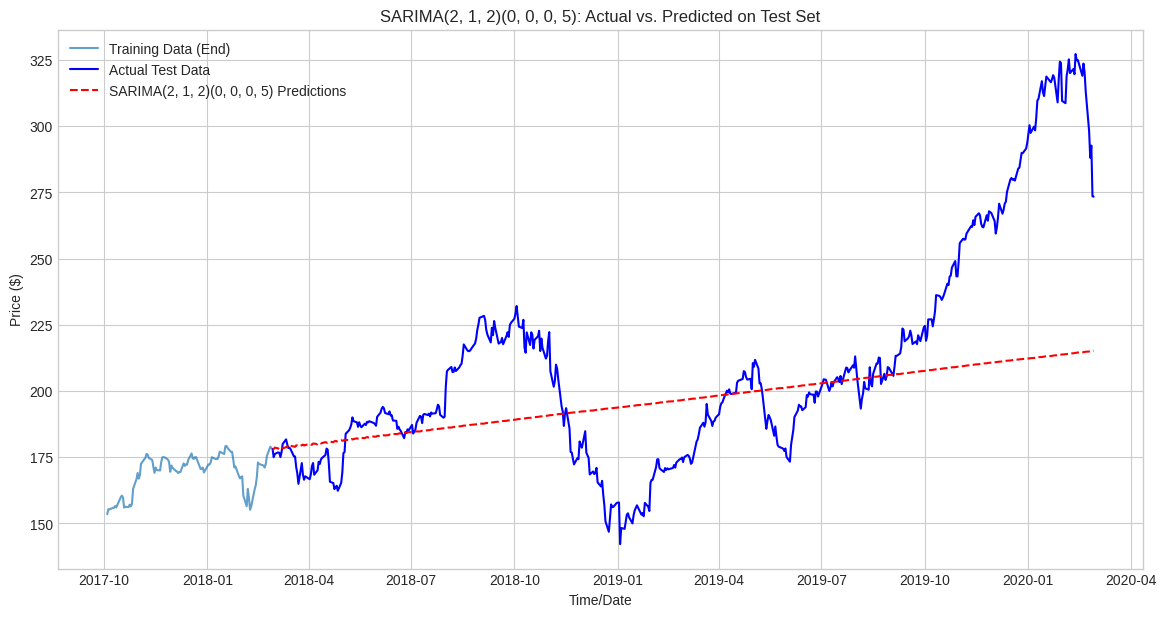

In [ ]:
# === SARIMA Model Evaluation (auto_arima inherently tunes orders) ===
print("\n--- Evaluating: SARIMA (using auto_arima on overall training data) ---")
try:
    sarima_model_final = auto_arima(
        df_overall_train.set_index('date')['close'].dropna(), # Use overall training data
        seasonal=True, m=5, # Example m=5
        stepwise=True, suppress_warnings=True,
        trace=False, error_action='ignore', n_jobs=-1
    )
    print(sarima_model_final.summary())
    predictions_sarima_final = sarima_model_final.predict(n_periods=n_overall_test)
    actual_sarima_final_test = df_overall_test['close'].values
    all_final_results.append(calculate_metrics(actual_sarima_final_test, predictions_sarima_final, f"SARIMA{sarima_model_final.order}{sarima_model_final.seasonal_order}"))
    plot_test_predictions(
        df_overall_train.set_index('date')['close'].tail(100),
        df_overall_test.set_index('date')['close'],
        predictions_sarima_final,
        f"SARIMA{sarima_model_final.order}{sarima_model_final.seasonal_order}"
    )
except Exception as e:
    print(f"Error evaluating SARIMA: {e}")


--- Tuning and Evaluating: LSTM ---
Reloading Tuner from lstm_tuner_dir/zidio_stock_lstm_tuning/tuner0.json
Starting Keras Tuner search for LSTM...

Best LSTM Hyperparameters found: {'units_lstm1': 96, 'lstm1_return_seq': False, 'dropout1': 0.2, 'units_dense': 16, 'learning_rate': 0.001, 'units_lstm2': 32, 'dropout2': 0.1}
Training final tuned LSTM model on overall training data...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Metrics for Tuned LSTM {'units_lstm1': 96, 'lstm1_return_seq': False, 'dropout1': 0.2, 'units_dense': 16, 'learning_rate': 0.001, 'units_lstm2': 32, 'dropout2': 0.1}: RMSE = 5.6931, MAE = 4.4010


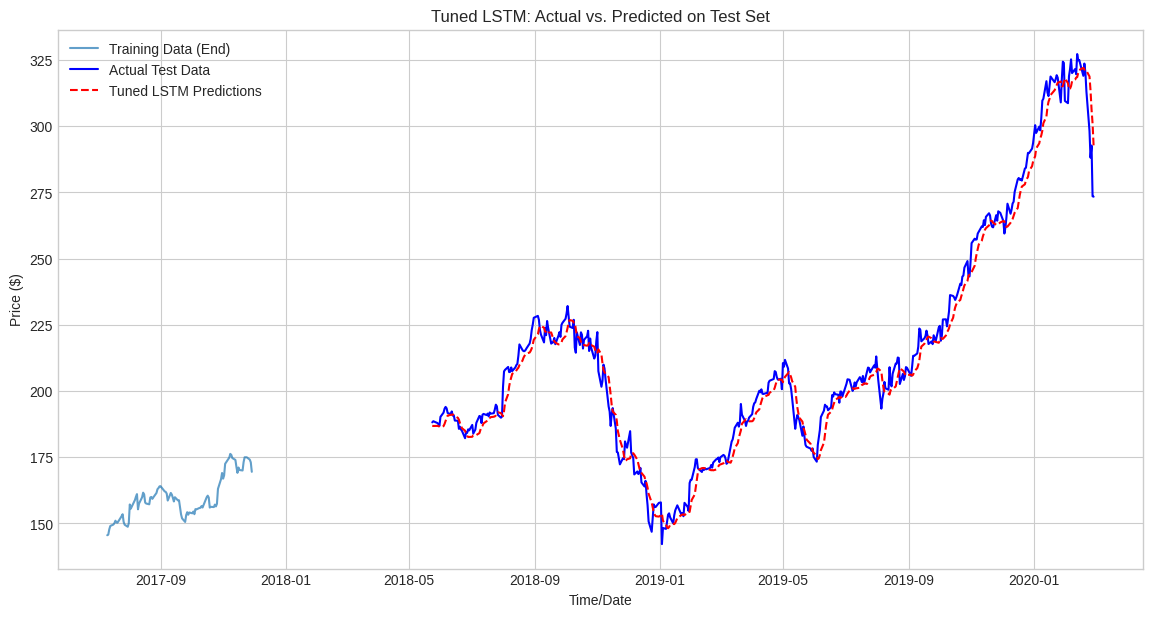

In [ ]:
# === LSTM Model Tuning with Keras Tuner and Evaluation ===
print("\n--- Tuning and Evaluating: LSTM ---")

# 1. Scale LSTM data for tuning (fit on tune_train, transform tune_train and tune_val)
scaler_lstm_tune = MinMaxScaler(feature_range=(0, 1))
scaled_lstm_tune_train = scaler_lstm_tune.fit_transform(data_lstm_tune_train_unscaled)
scaled_lstm_tune_val = scaler_lstm_tune.transform(data_lstm_tune_val_unscaled)

# 2. Create sequences for tuning
def create_lstm_sequences(dataset, look_back=LSTM_LOOK_BACK):
    X, Y = [], []
    if len(dataset) <= look_back: # Check if dataset is long enough
        return np.array(X), np.array(Y)
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X_tune_train_lstm, y_tune_train_lstm = create_lstm_sequences(scaled_lstm_tune_train)
X_tune_val_lstm, y_tune_val_lstm_scaled = create_lstm_sequences(scaled_lstm_tune_val)

# Reshape for LSTM
if X_tune_train_lstm.size > 0 and X_tune_val_lstm.size > 0: # Check if sequences were created
    X_tune_train_lstm = np.reshape(X_tune_train_lstm, (X_tune_train_lstm.shape[0], X_tune_train_lstm.shape[1], 1))
    X_tune_val_lstm = np.reshape(X_tune_val_lstm, (X_tune_val_lstm.shape[0], X_tune_val_lstm.shape[1], 1))

    # 3. Keras Tuner: Define the hypermodel
    def build_lstm_hypermodel(hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_lstm1', min_value=32, max_value=96, step=32),
                       return_sequences=hp.Boolean('lstm1_return_seq'), # Tune if second LSTM layer exists
                       input_shape=(LSTM_LOOK_BACK, 1)))
        model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.4, step=0.1)))

        if hp.Boolean('lstm1_return_seq'): # Only add second LSTM if first returns sequences
            model.add(LSTM(units=hp.Int('units_lstm2', min_value=32, max_value=64, step=32)))
            model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.3, step=0.1)))

        model.add(Dense(hp.Int('units_dense', min_value=16, max_value=32, step=16)))
        model.add(Dense(1))
        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 5e-4])),
                      loss='mean_squared_error')
        return model

    # Instantiate the tuner
    tuner = RandomSearch( # Or Hyperband for more advanced search
        build_lstm_hypermodel,
        objective='val_loss',
        max_trials=KERAS_TUNER_MAX_TRIALS,
        executions_per_trial=KERAS_TUNER_EXECUTIONS_PER_TRIAL,
        directory='lstm_tuner_dir',
        project_name='zidio_stock_lstm_tuning'
    )

    print("Starting Keras Tuner search for LSTM...")
    tuner.search(X_tune_train_lstm, y_tune_train_lstm,
                 epochs=LSTM_EPOCHS_TUNING, # Use fewer epochs for tuning
                 batch_size=LSTM_BATCH_SIZE,
                 validation_data=(X_tune_val_lstm, y_tune_val_lstm_scaled),
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                 verbose=1)

    best_lstm_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"\nBest LSTM Hyperparameters found: {best_lstm_hps.values}")

     # 4. Train final tuned LSTM model on the full overall training data
    print("Training final tuned LSTM model on overall training data...")
    # Prepare full overall training data for LSTM
    scaler_final_lstm = MinMaxScaler(feature_range=(0, 1))
    scaled_overall_train_lstm = scaler_final_lstm.fit_transform(df_overall_train[['close']].values)
    X_overall_train_lstm, y_overall_train_lstm = create_lstm_sequences(scaled_overall_train_lstm)

    if X_overall_train_lstm.size > 0:
        X_overall_train_lstm = np.reshape(X_overall_train_lstm, (X_overall_train_lstm.shape[0], X_overall_train_lstm.shape[1], 1))

        final_tuned_lstm_model = tuner.hypermodel.build(best_lstm_hps)
        history_final_lstm = final_tuned_lstm_model.fit(
                                X_overall_train_lstm, y_overall_train_lstm,
                                epochs=LSTM_EPOCHS_FINAL, batch_size=LSTM_BATCH_SIZE,
                                verbose=0 # Can set to 1 for progress
                            )
        # Prepare overall test data for LSTM evaluation
        scaled_overall_test_lstm = scaler_final_lstm.transform(df_overall_test[['close']].values)
        X_overall_test_lstm, y_overall_test_lstm_scaled = create_lstm_sequences(scaled_overall_test_lstm)

        if X_overall_test_lstm.size > 0:
            X_overall_test_lstm = np.reshape(X_overall_test_lstm, (X_overall_test_lstm.shape[0], X_overall_test_lstm.shape[1], 1))

            # 5. Predict and Evaluate final tuned LSTM
            predictions_final_lstm_scaled = final_tuned_lstm_model.predict(X_overall_test_lstm)
            predictions_final_lstm_original = scaler_final_lstm.inverse_transform(predictions_final_lstm_scaled)

            actual_final_lstm_test_original = df_overall_test['close'].iloc[LSTM_LOOK_BACK : LSTM_LOOK_BACK + len(predictions_final_lstm_original)].values

            min_len_final = min(len(actual_final_lstm_test_original), len(predictions_final_lstm_original))
            actual_final_lstm_test_original = actual_final_lstm_test_original[:min_len_final]
            predictions_final_lstm_original = predictions_final_lstm_original[:min_len_final]

            if len(actual_final_lstm_test_original) > 0:
                all_final_results.append(calculate_metrics(actual_final_lstm_test_original, predictions_final_lstm_original, f"Tuned LSTM {best_lstm_hps.values}"))
                plot_test_predictions(
                    df_overall_train.set_index('date')['close'].iloc[- (100 + LSTM_LOOK_BACK) : -LSTM_LOOK_BACK], # Effective train end
                    df_overall_test.set_index('date')['close'].iloc[LSTM_LOOK_BACK : LSTM_LOOK_BACK + len(actual_final_lstm_test_original)], # Effective test start
                    predictions_final_lstm_original,
                    f"Tuned LSTM"
                )
        else:
            print("Not enough data in overall test set for LSTM sequence creation after look_back.")
    else:
        print("Not enough data in overall training set for LSTM sequence creation after look_back.")
else:
    print("Not enough data for LSTM tuning after train/validation split.")

In [ ]:
# --- 5. Display Comparative Results of Tuned Models ---
if all_final_results:
    final_results_df = pd.DataFrame(all_final_results)
    print("\n\n--- Final Model Comparison Results (Tuned Models on Overall Test Set) ---")
    print(final_results_df.sort_values(by='RMSE'))
else:
    print("\nNo models were successfully tuned and evaluated on the final test set.")

print("\n--- Model Tuning and Evaluation Complete ---")



--- Final Model Comparison Results (Tuned Models on Overall Test Set) ---
                                               Model       RMSE        MAE
2  Tuned LSTM {'units_lstm1': 96, 'lstm1_return_s...   5.693108   4.401000
0  Tuned Prophet {'changepoint_prior_scale': 0.01...  31.777216  25.310342
1                        SARIMA(2, 1, 2)(0, 0, 0, 5)  37.435042  25.591056

--- Model Tuning and Evaluation Complete ---
